# ***Hello Everyone Welcome To This Project Of Detection Of Tumor In Brain Live Implementation Using Yolov8 And Roboflow***

# ***Introduction Of Roboflow Shall Before Starting of Yolov8 Object Detection***

# [![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

# ***So Our Introduction Of Roboflow And Ultralytics Is Done. After It We Wanted To Connect The Device With GPU support Because The Training Required Model Is Not done With CPU Thats Why We Required GPU Support So For Gpu Support for Which We Write Command !nvidia-smi which Is Automatically Connected The Harware Change The Support From CPU To GPU Support***

In [35]:
! nvidia-smi

Sat Sep  9 05:44:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# ***So Our Device Is Connected With GPU After This We Wanted To Import Some Libraries That Name is Ipython.display Import Image and Display and Also Import One More Important Libray That Name Is Ultralytics Which Is Very Useful For Our Import yolov8 And Custom Model***

# ***First We Install Newly Version Of our Library IPython and Ultralytics For Better Performance Of Our Custom Model***

# ***IPython Installation***

In [36]:
! pip install IPython

# ***Ultralytics Installation***

In [37]:
! pip install ultralytics==8.0.20

# ***After This We Import Some Our Important Module Like Yolov8 And Image***

In [38]:
import IPython
import ultralytics
from IPython import display
from IPython.display import Image

from ultralytics import YOLO


display.clear_output()

ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


# ***Check Our Home Directory***

In [39]:
import os
HOME = os.getcwd()

print(HOME)

/content


# ***Created The Newly Yolov8 Model***

In [40]:
model = YOLO('yolov8n.pt')

# ***Creating Dataset Directory For Trained Model Abd Save Result in Run***

# ***Creating A Snippet From Roboflow After Annotation Of Image In Our Dataset Brain Tumor***

# ***So This Code Is Directly Created A Newly Directory Datasets For Running Different Image Of Datasets***

In [41]:
! mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4hb41qOjX29oxqP9v6PZ")
project = rf.workspace("tumordetectie-tsqji").project("ik-moest-van-meneer-wulgaert")
dataset = project.version(1).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to ik-moest-van-meneer-wulgaert-1 in yolov8:: 100%|██████████| 282/282 [00:00<00:00, 3983.77it/s]


# ***After Import Our Dataset Brain Tumor We Would Train Our Newly Custom Base Model We Want Trained All Image By Running Epochs And Increase Accuracy And Decrease Losses From It And Created A Mask Image Of Brain Tumor Part In Our Custom Model Using Yolov8 Model To Detecting Brain Tumor***

In [42]:
%cd {HOME}

! yolo task = detect mode=train model = yolov8n.pt data={dataset.location}/data.yaml epochs=50 imgsz=700 plots=True


/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/datasets/ik-moest-van-meneer-wulgaert-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=700, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8

In [43]:
! ls {HOME}/runs/detect/train

args.yaml					   train_batch0.jpg
confusion_matrix.png				   train_batch1.jpg
events.out.tfevents.1694235176.e294a3836d1e.578.0  train_batch2.jpg
F1_curve.png					   train_batch320.jpg
P_curve.png					   train_batch321.jpg
PR_curve.png					   train_batch322.jpg
R_curve.png					   val_batch0_labels.jpg
results.csv					   val_batch0_pred.jpg
results.png					   weights


# ***Creating Confusion Matrix Pnj Image After Training Our Dataset***

/content


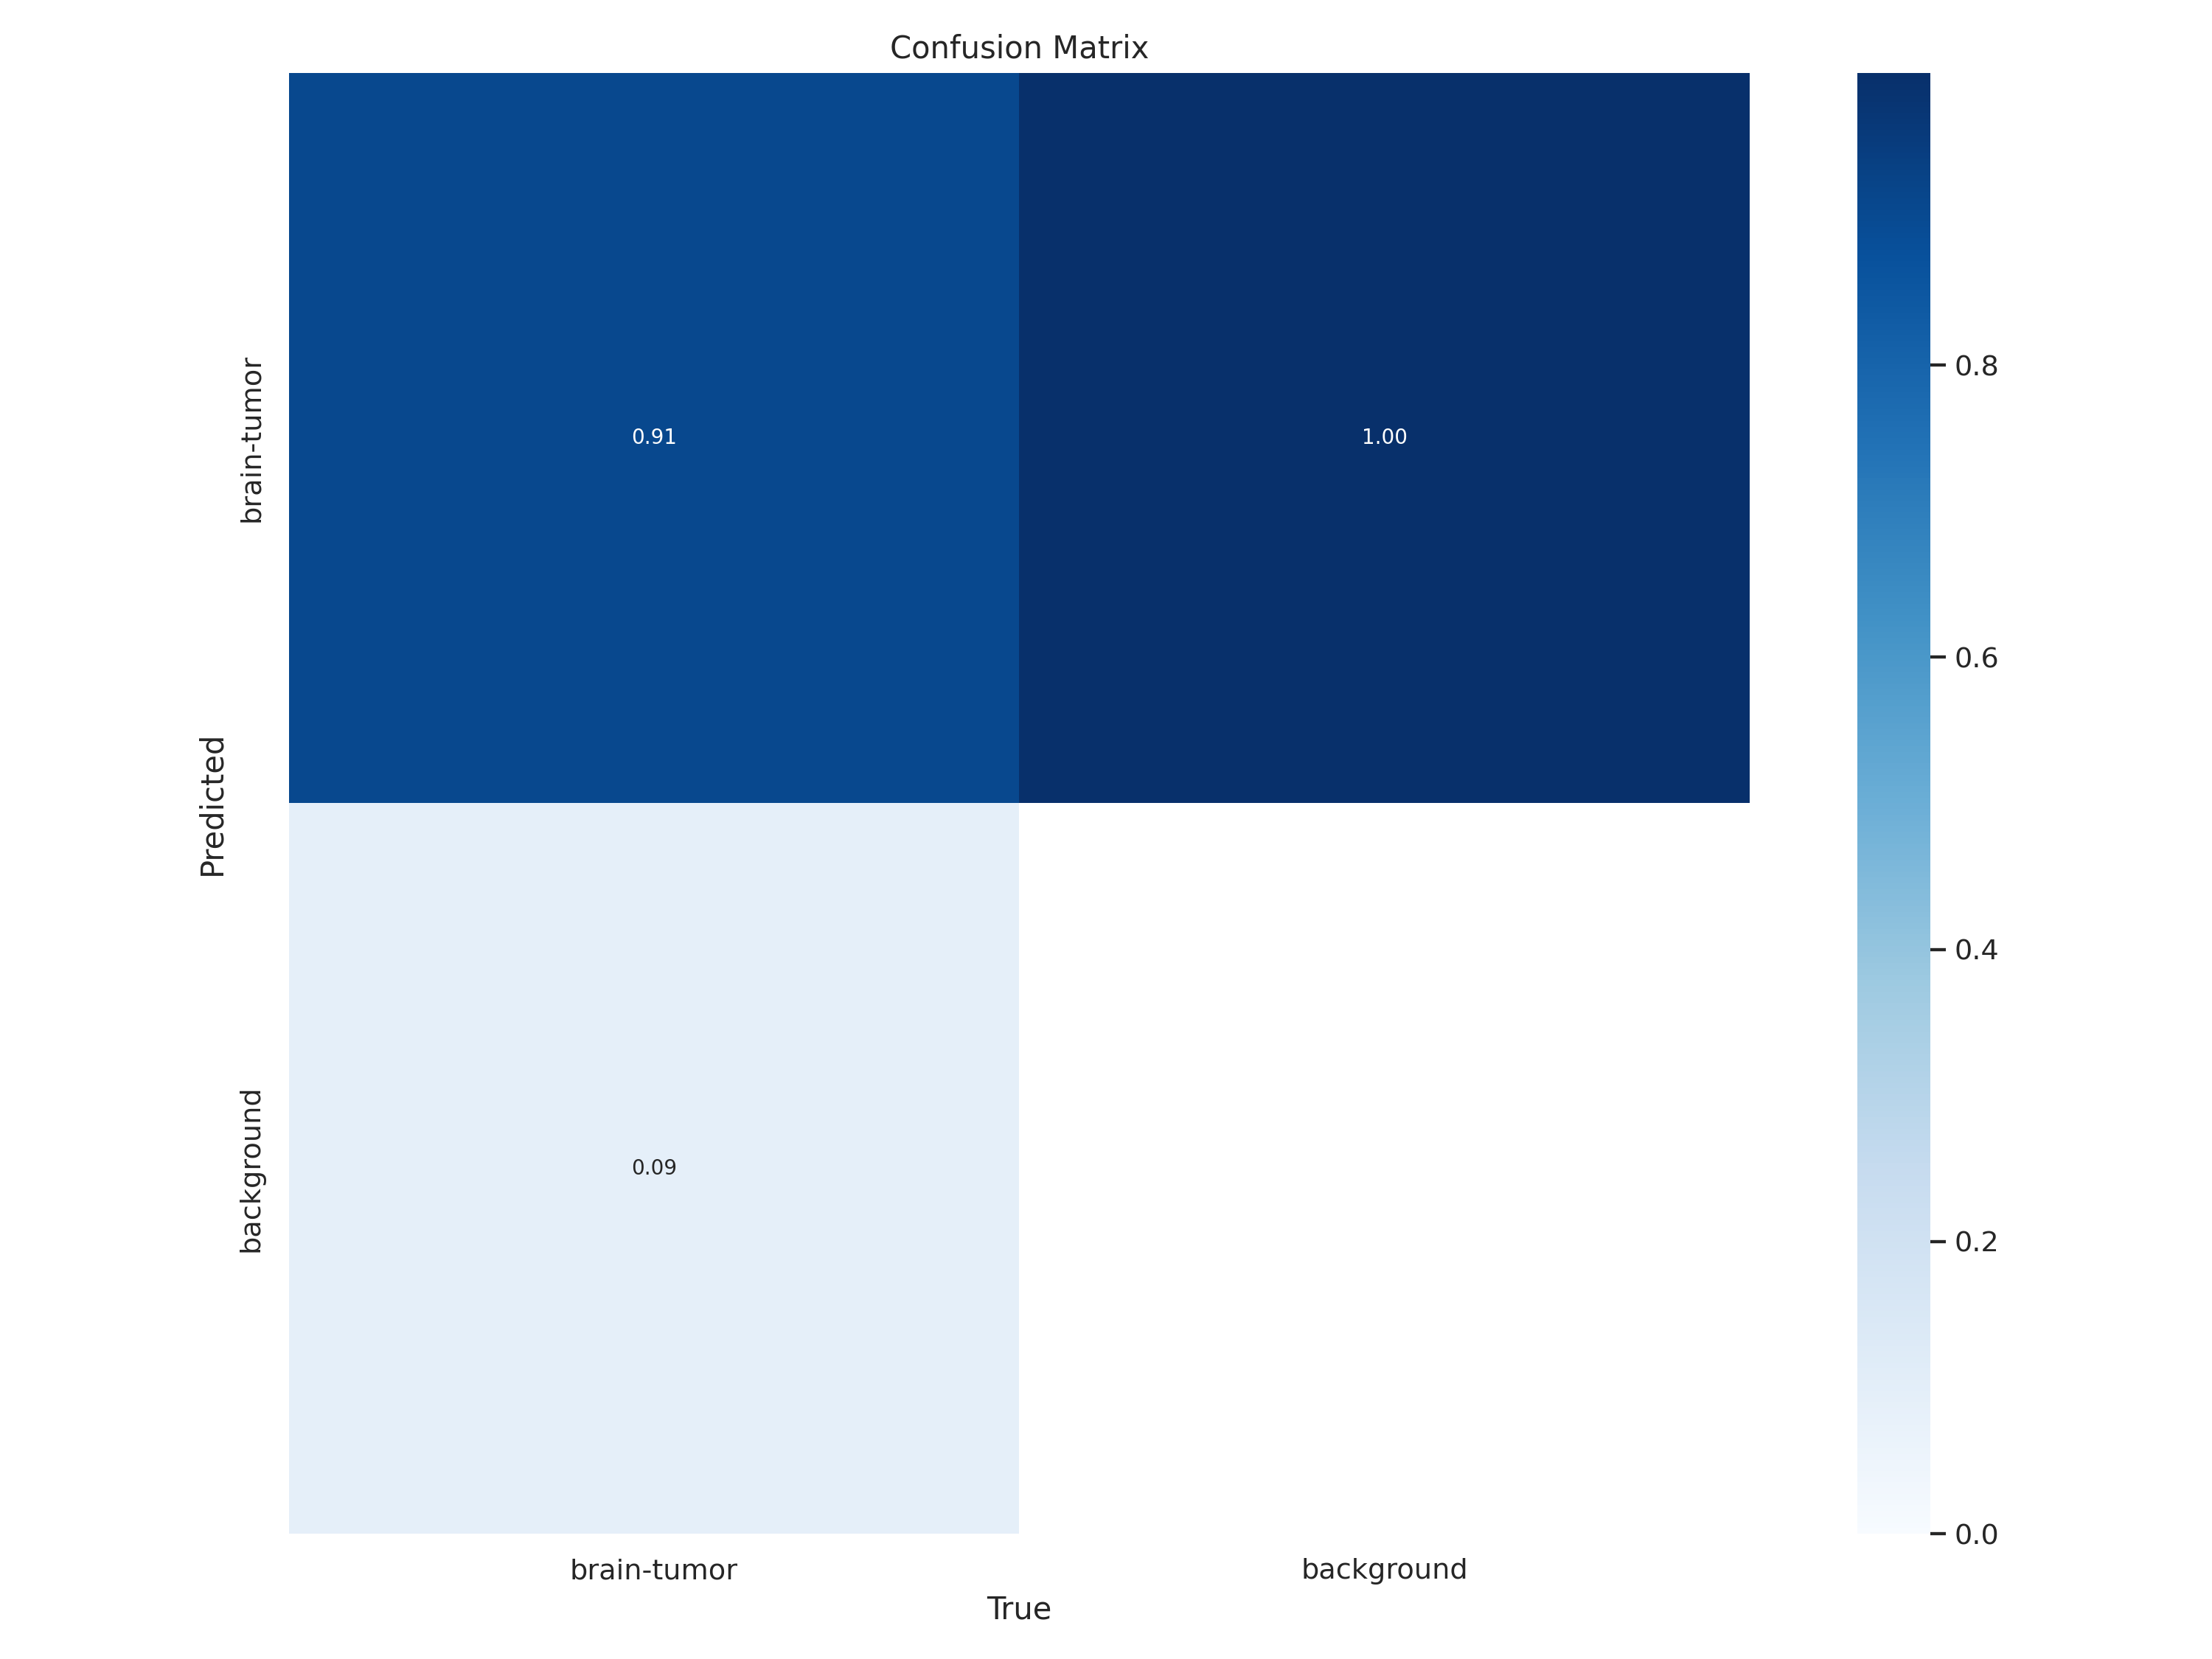

In [44]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png',width=600)

# ***Creating Results After Training Custom Model Using Yolov8****

/content


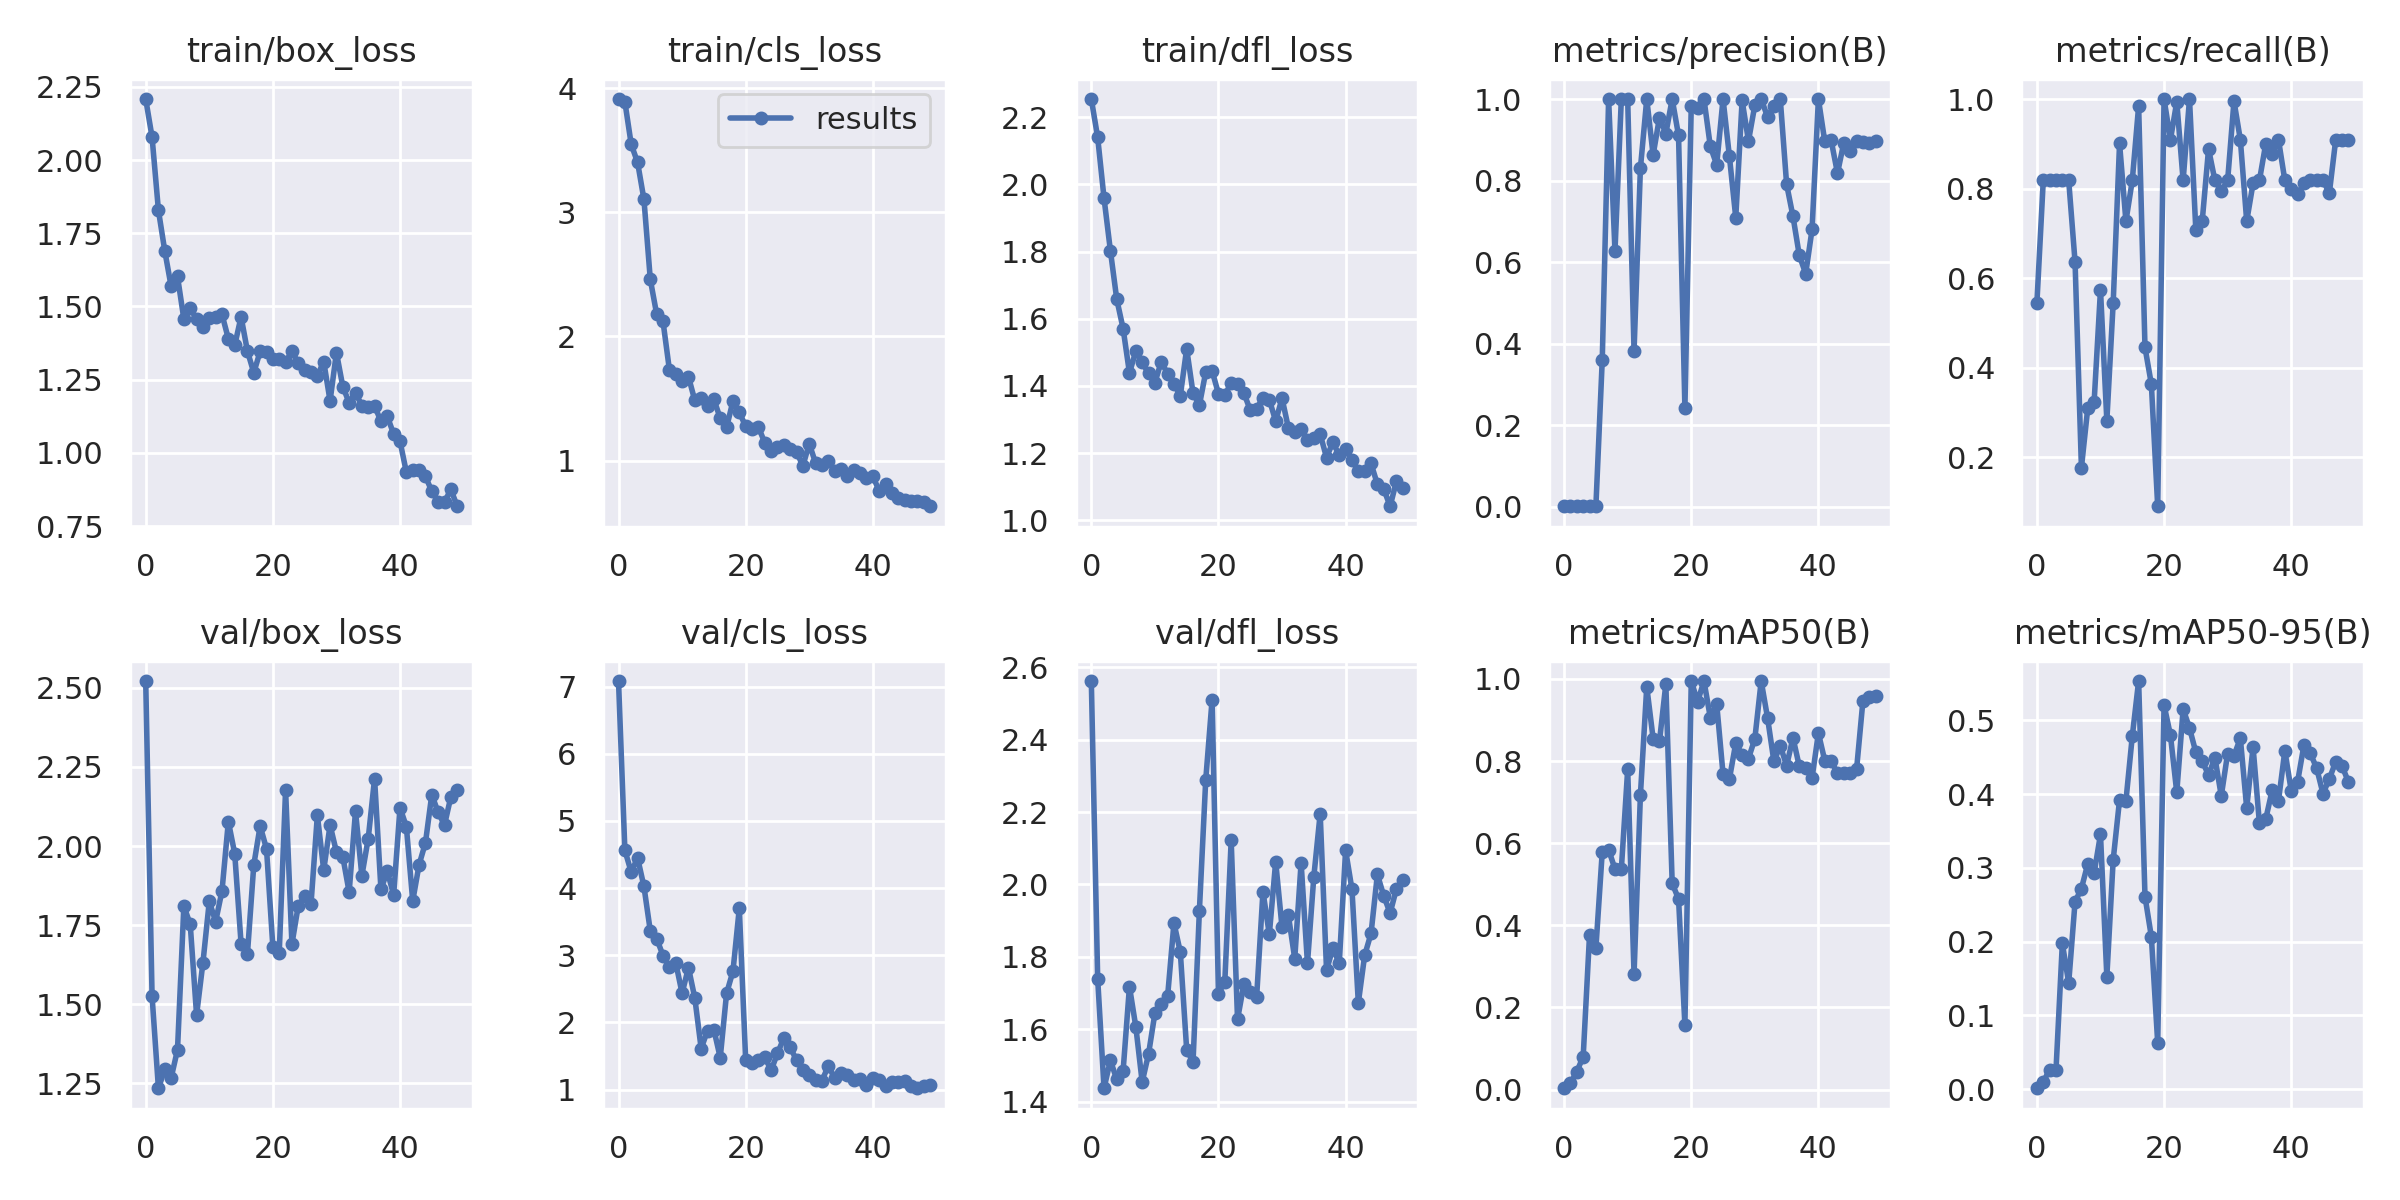

In [45]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/results.png',width=600)

# ***Creating Our F1 Curve For Custom Model***

/content


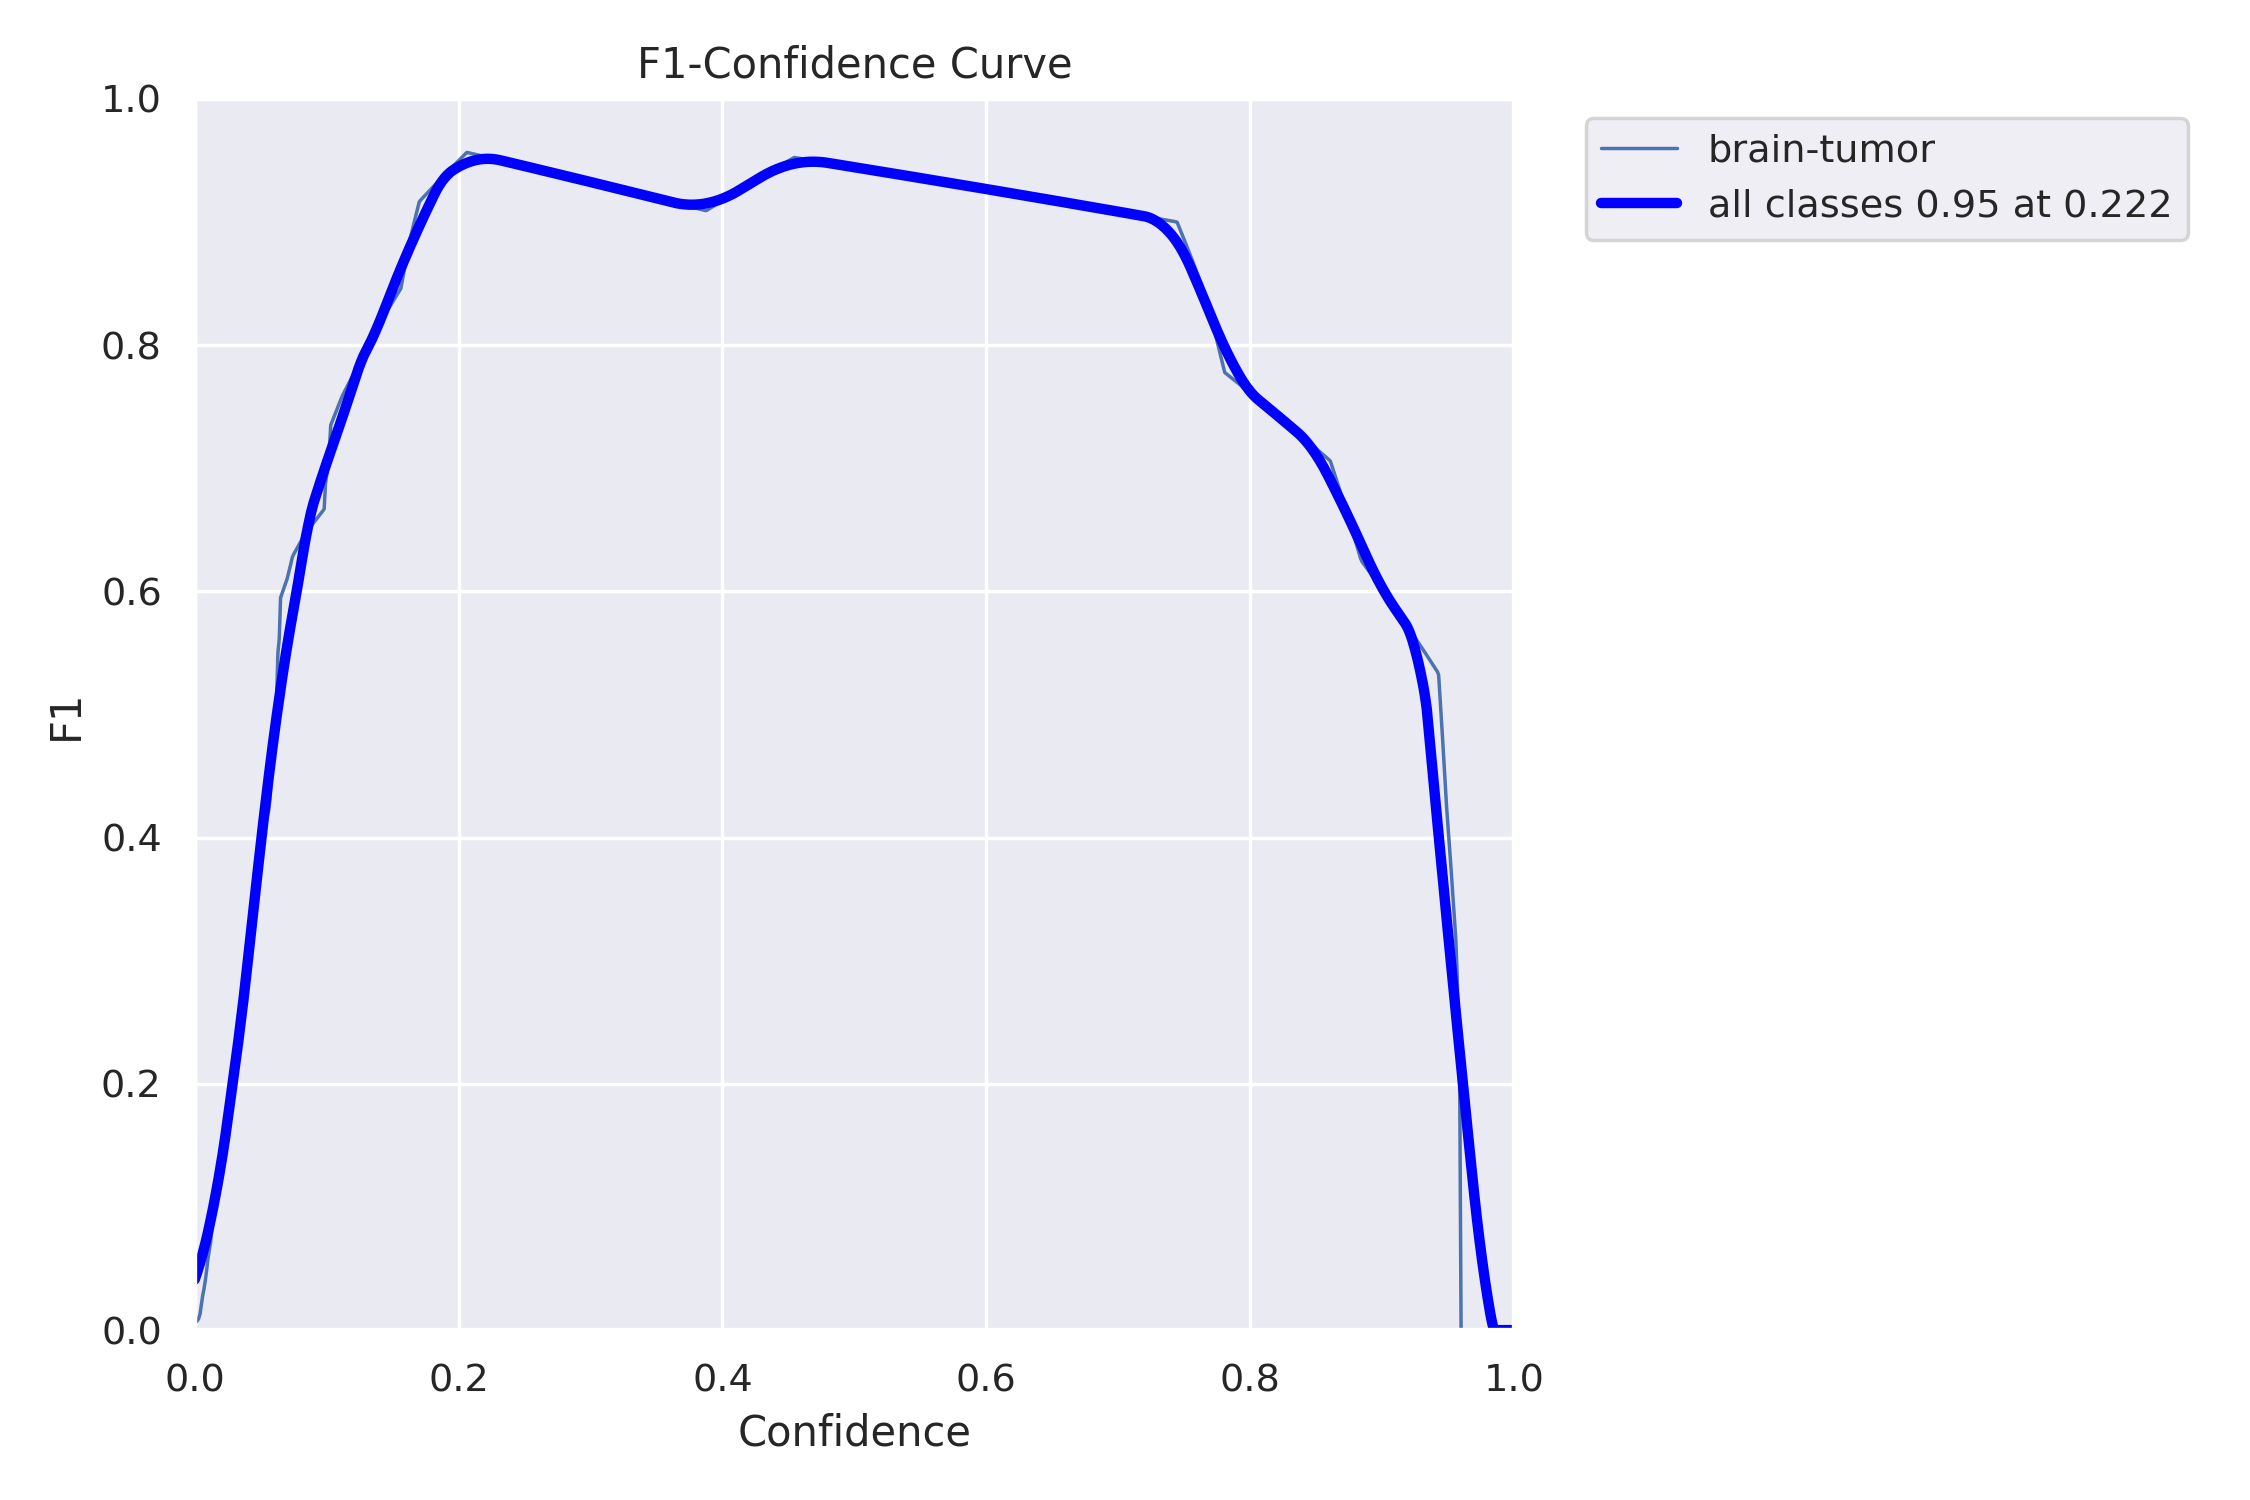

In [46]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/F1_curve.png',width=600)

# ***Creating P Curve  Or Precession Curve For Accuracy After Training Our Custom Model***

/content


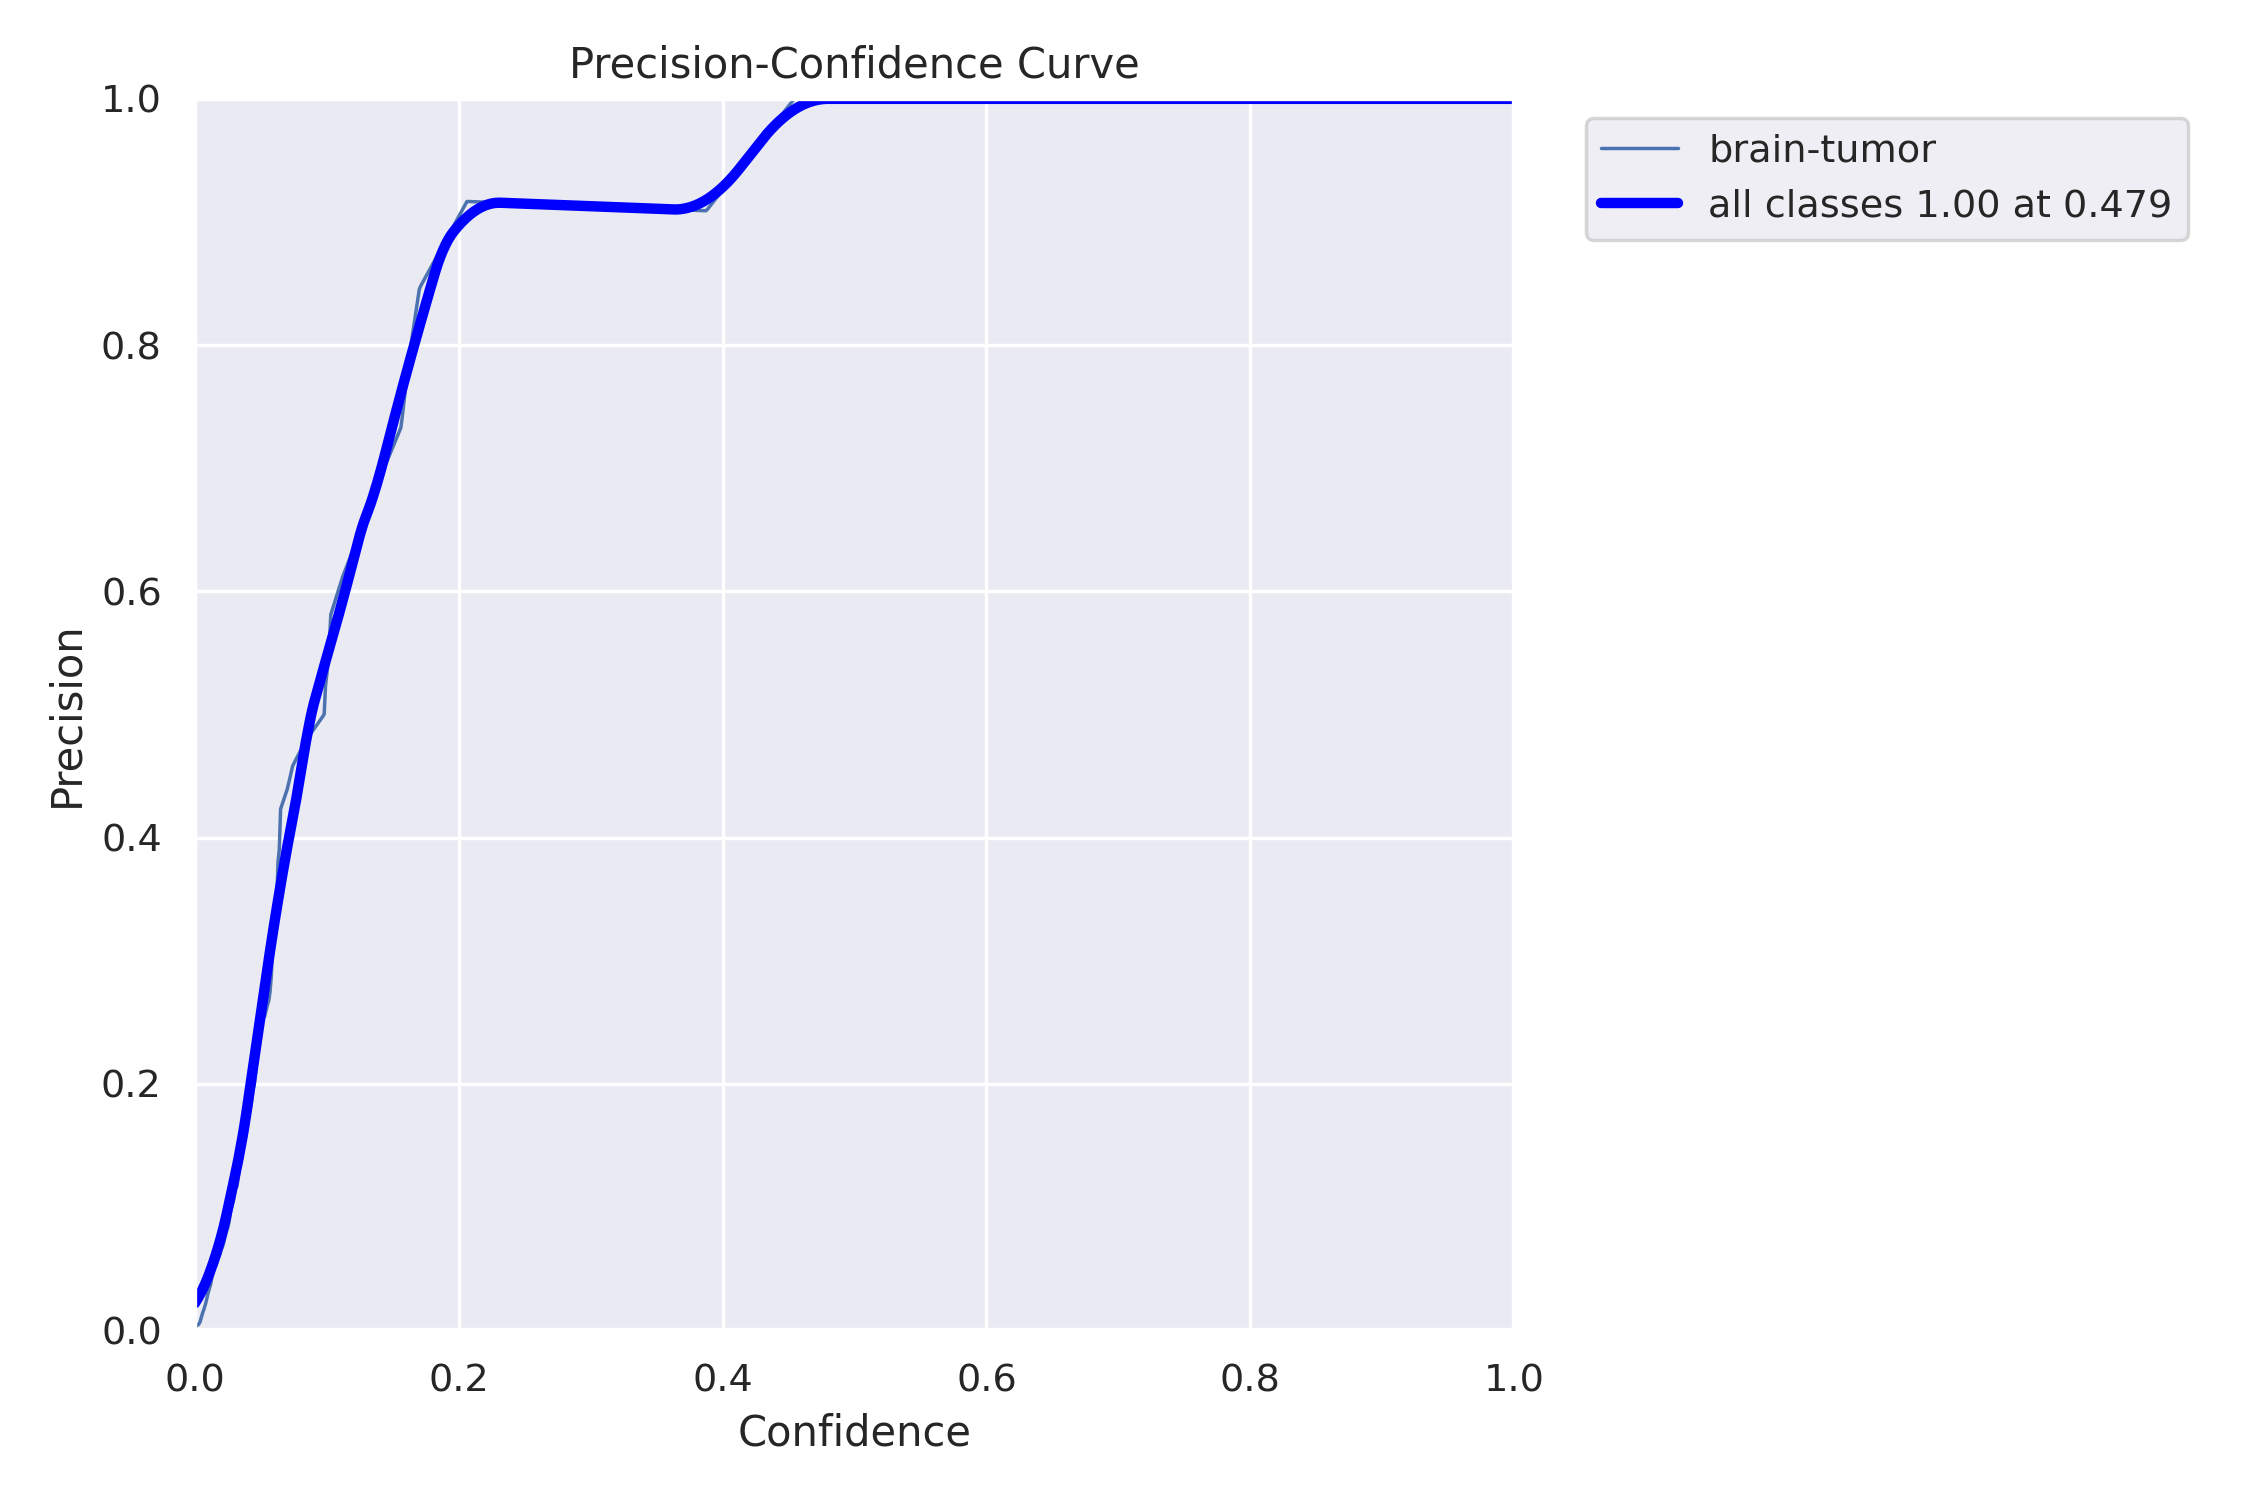

In [47]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/P_curve.png',width=600)

# ***Creating Precesion Recall Curve For Ploting A Curve Between Real Valu And Predicted Value For Training Custom Model***

/content


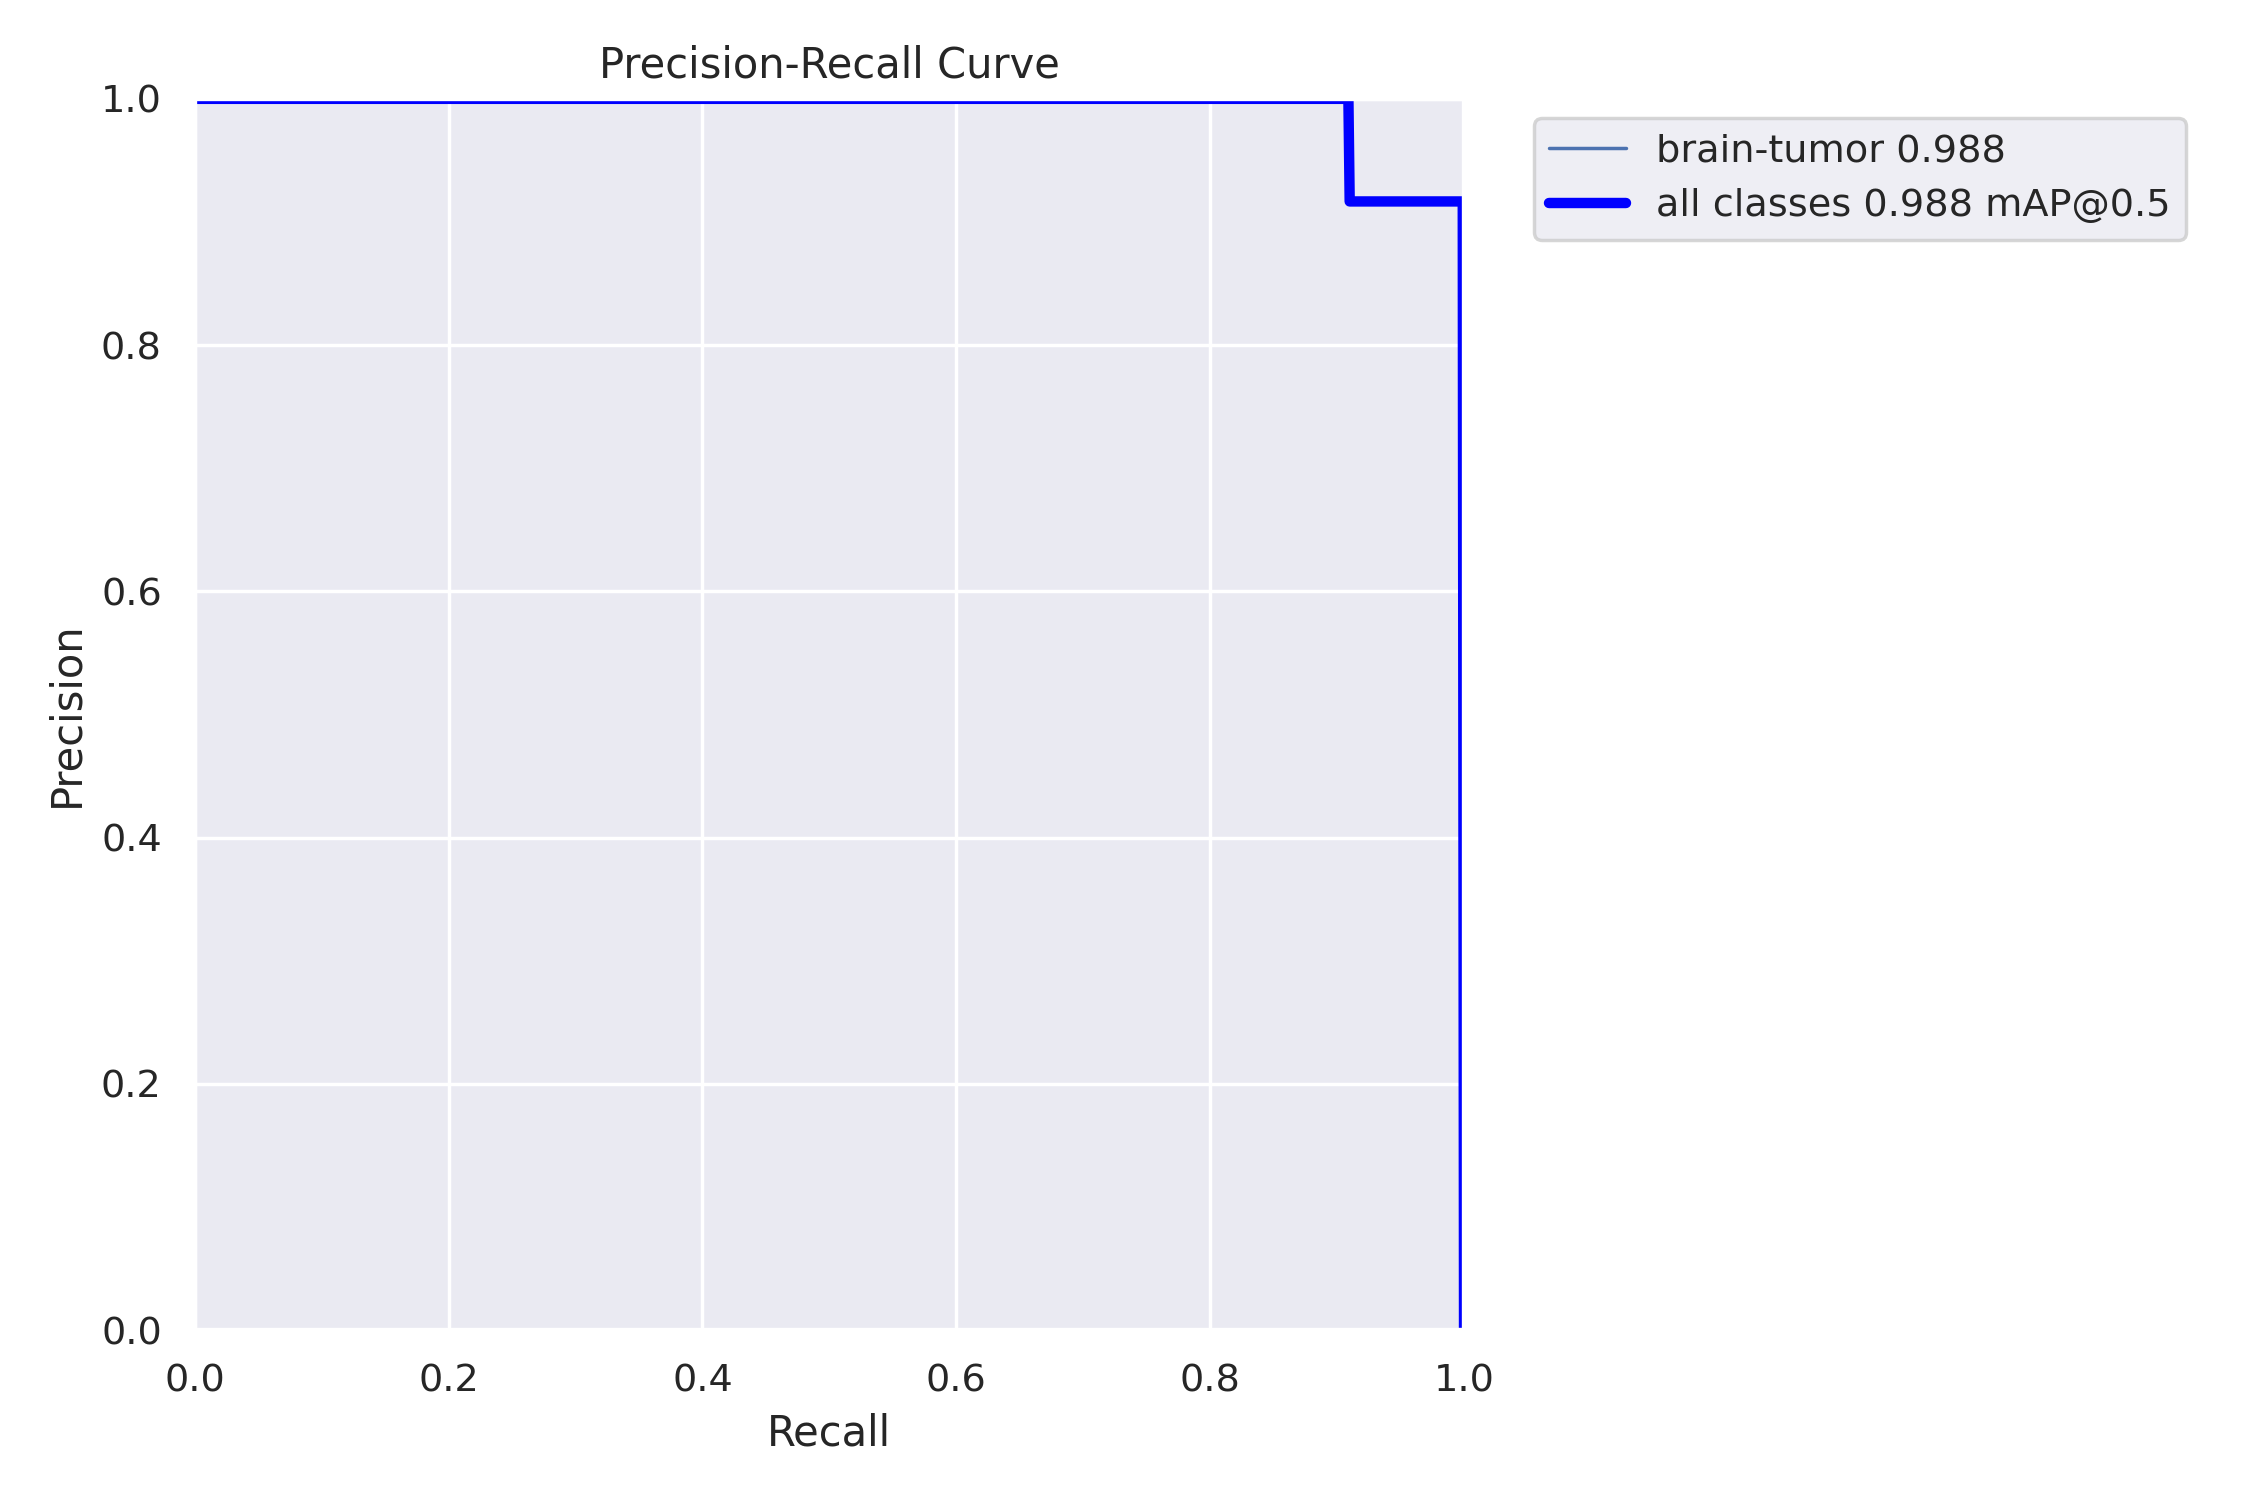

In [48]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/PR_curve.png',width=600)

# ***Recall Curve Custom Model***

/content


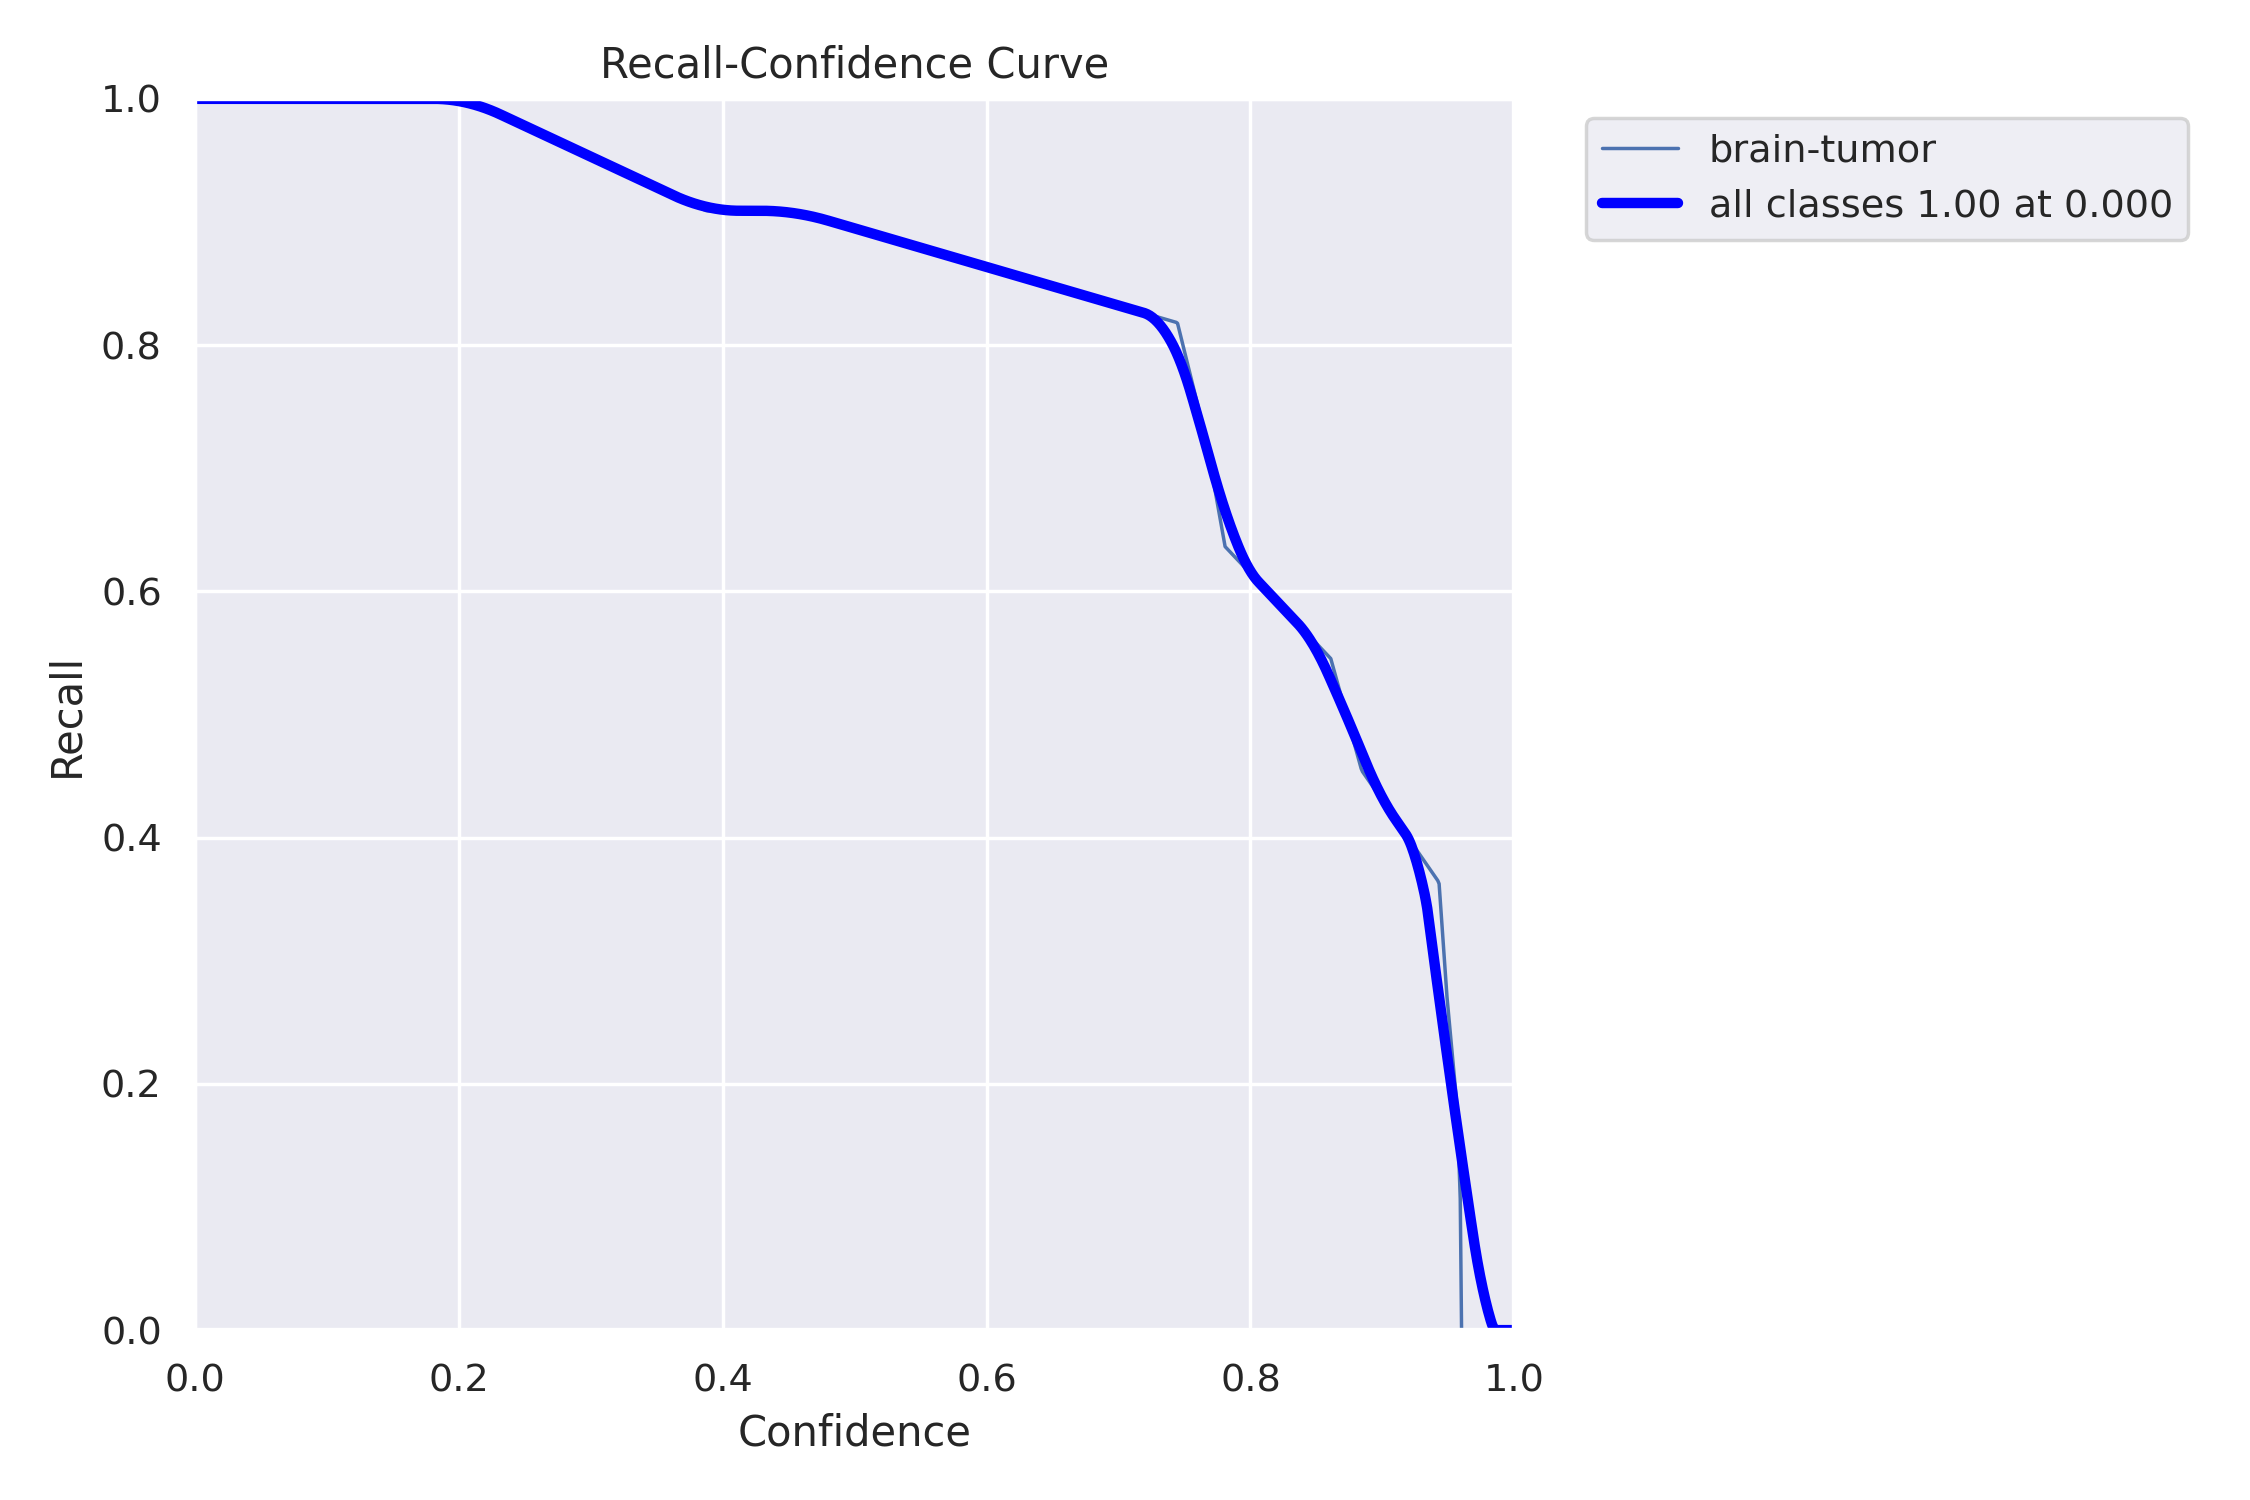

In [49]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/R_curve.png',width=600)

# ***Loading some Images After Training Our Custom Model And Giving Label Brain Tumor part After Training***

# ***Train batch 0 JPG Image***

/content


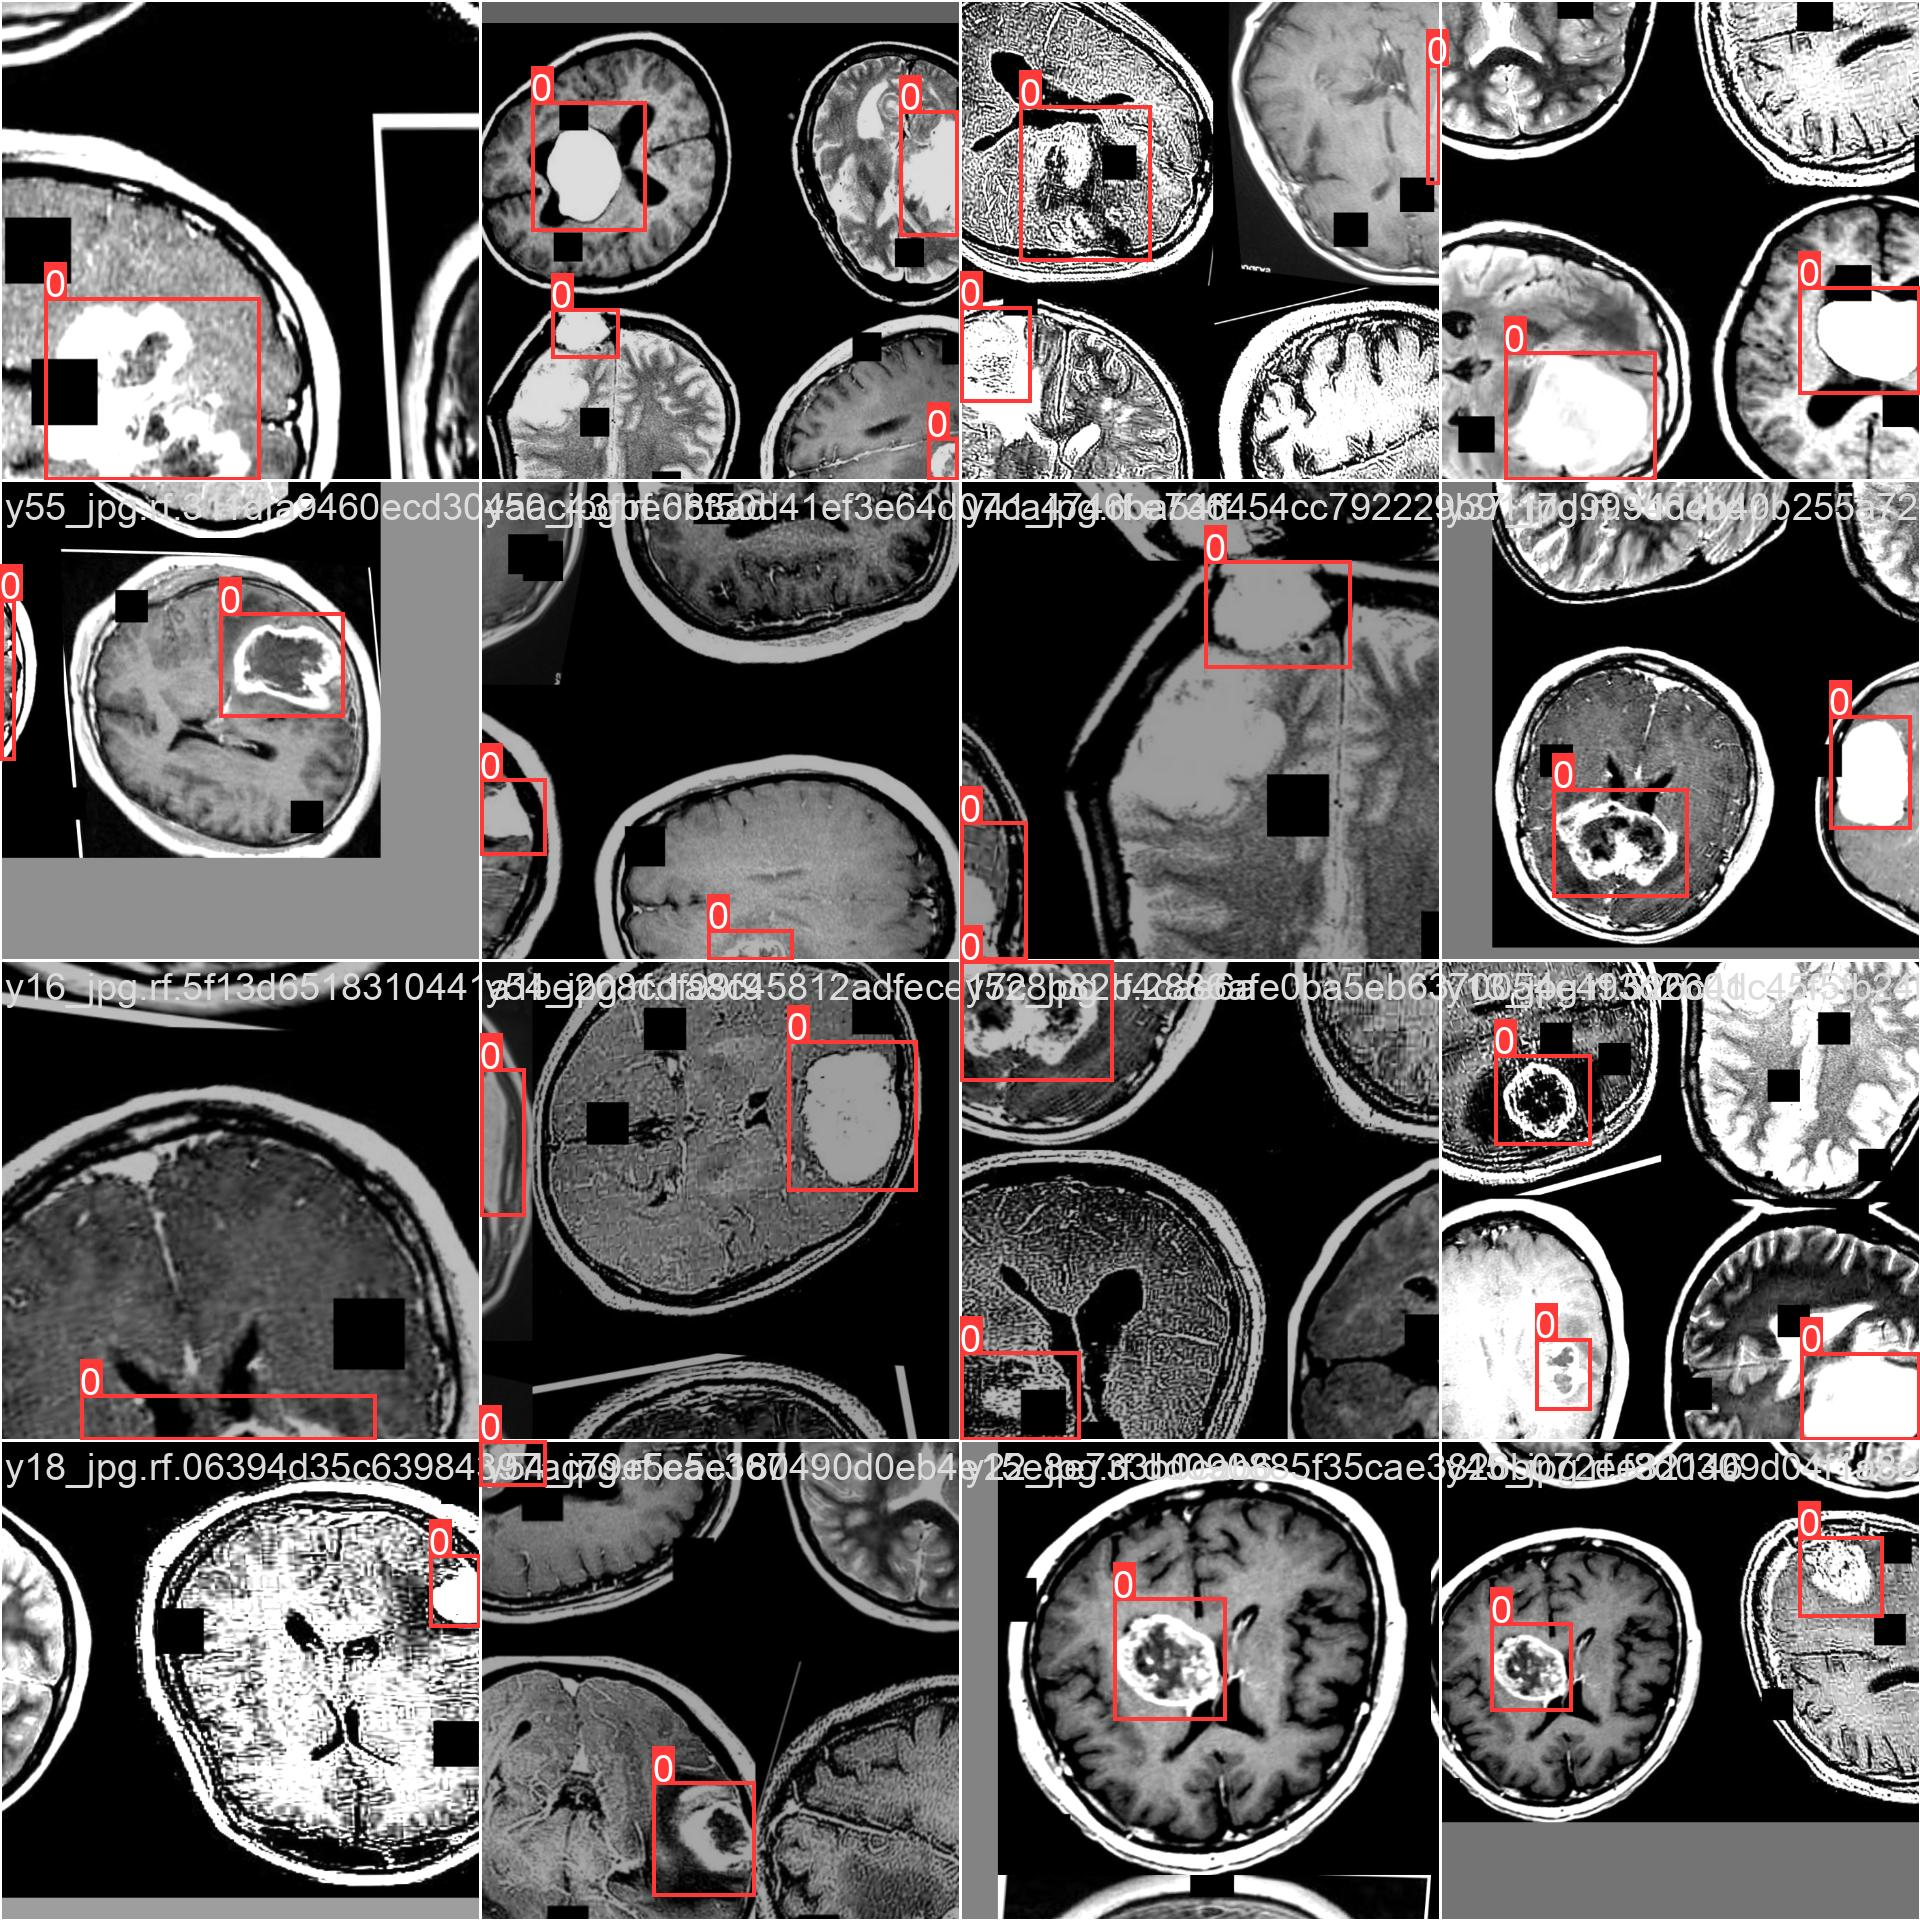

In [50]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg',width=800)

# ***Train Batch1 JPG Image***

/content


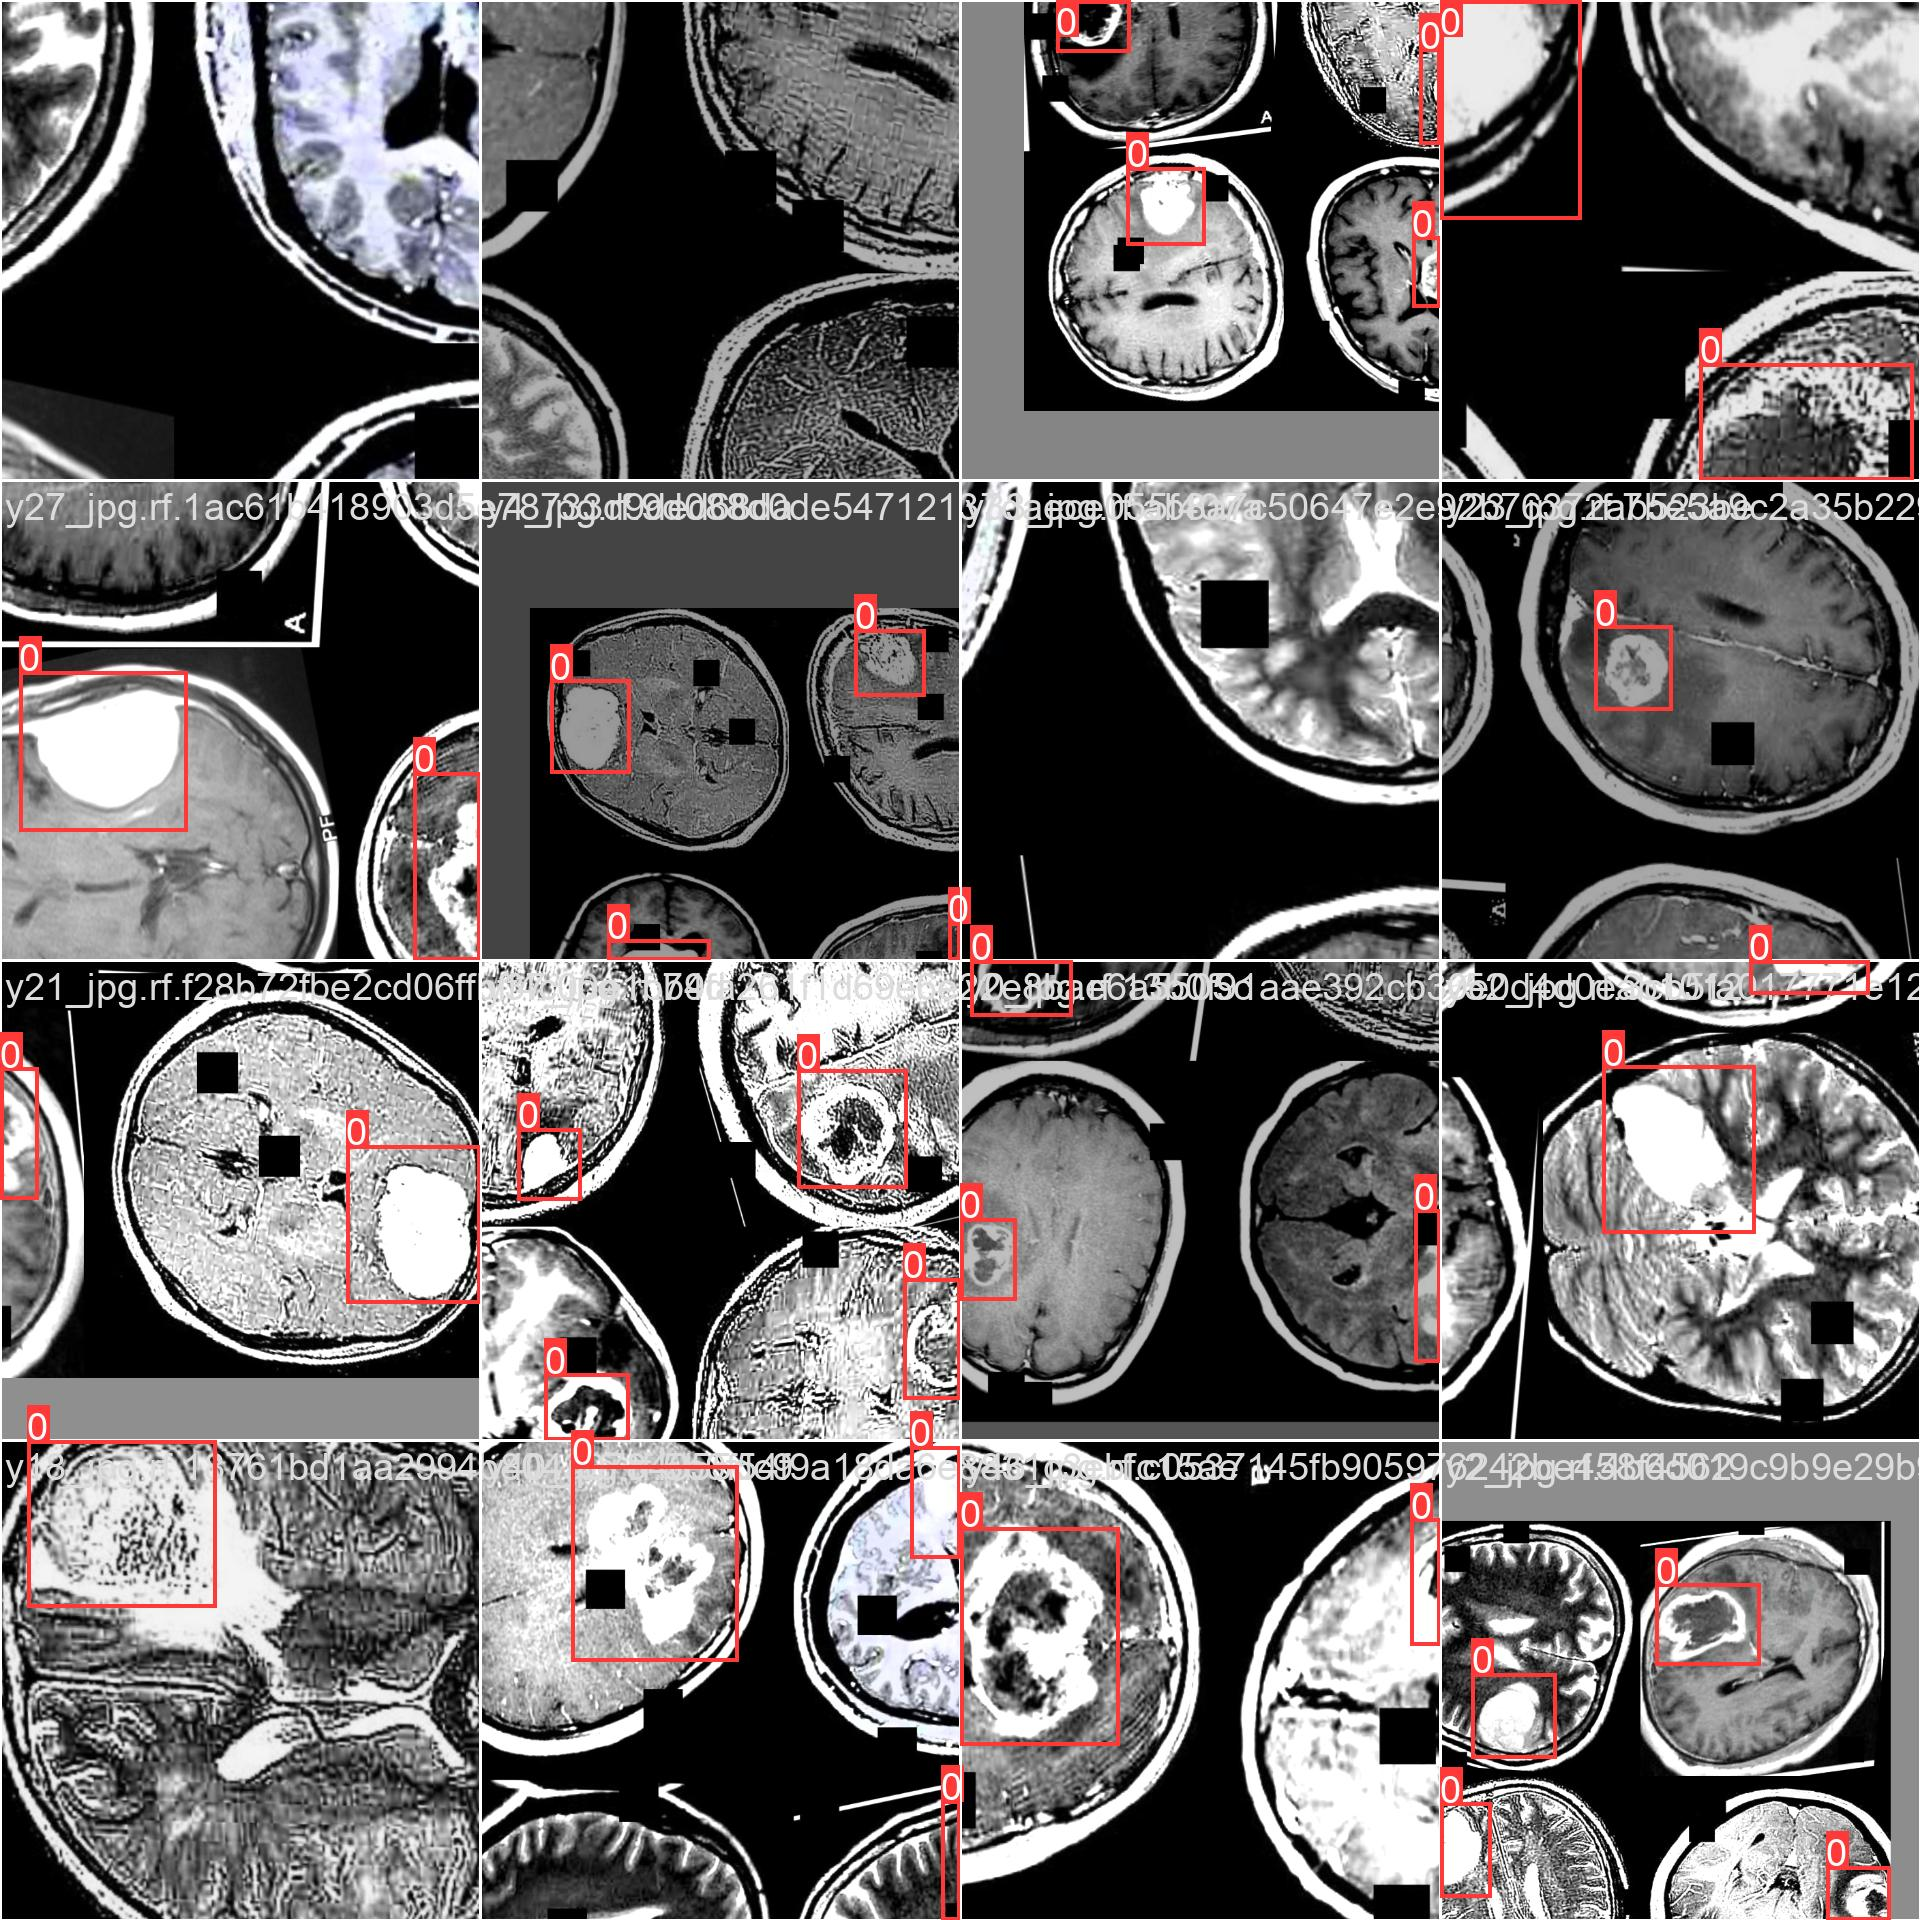

In [51]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/train_batch1.jpg',width=800)

# ***Train Batch 2 JPG***

/content


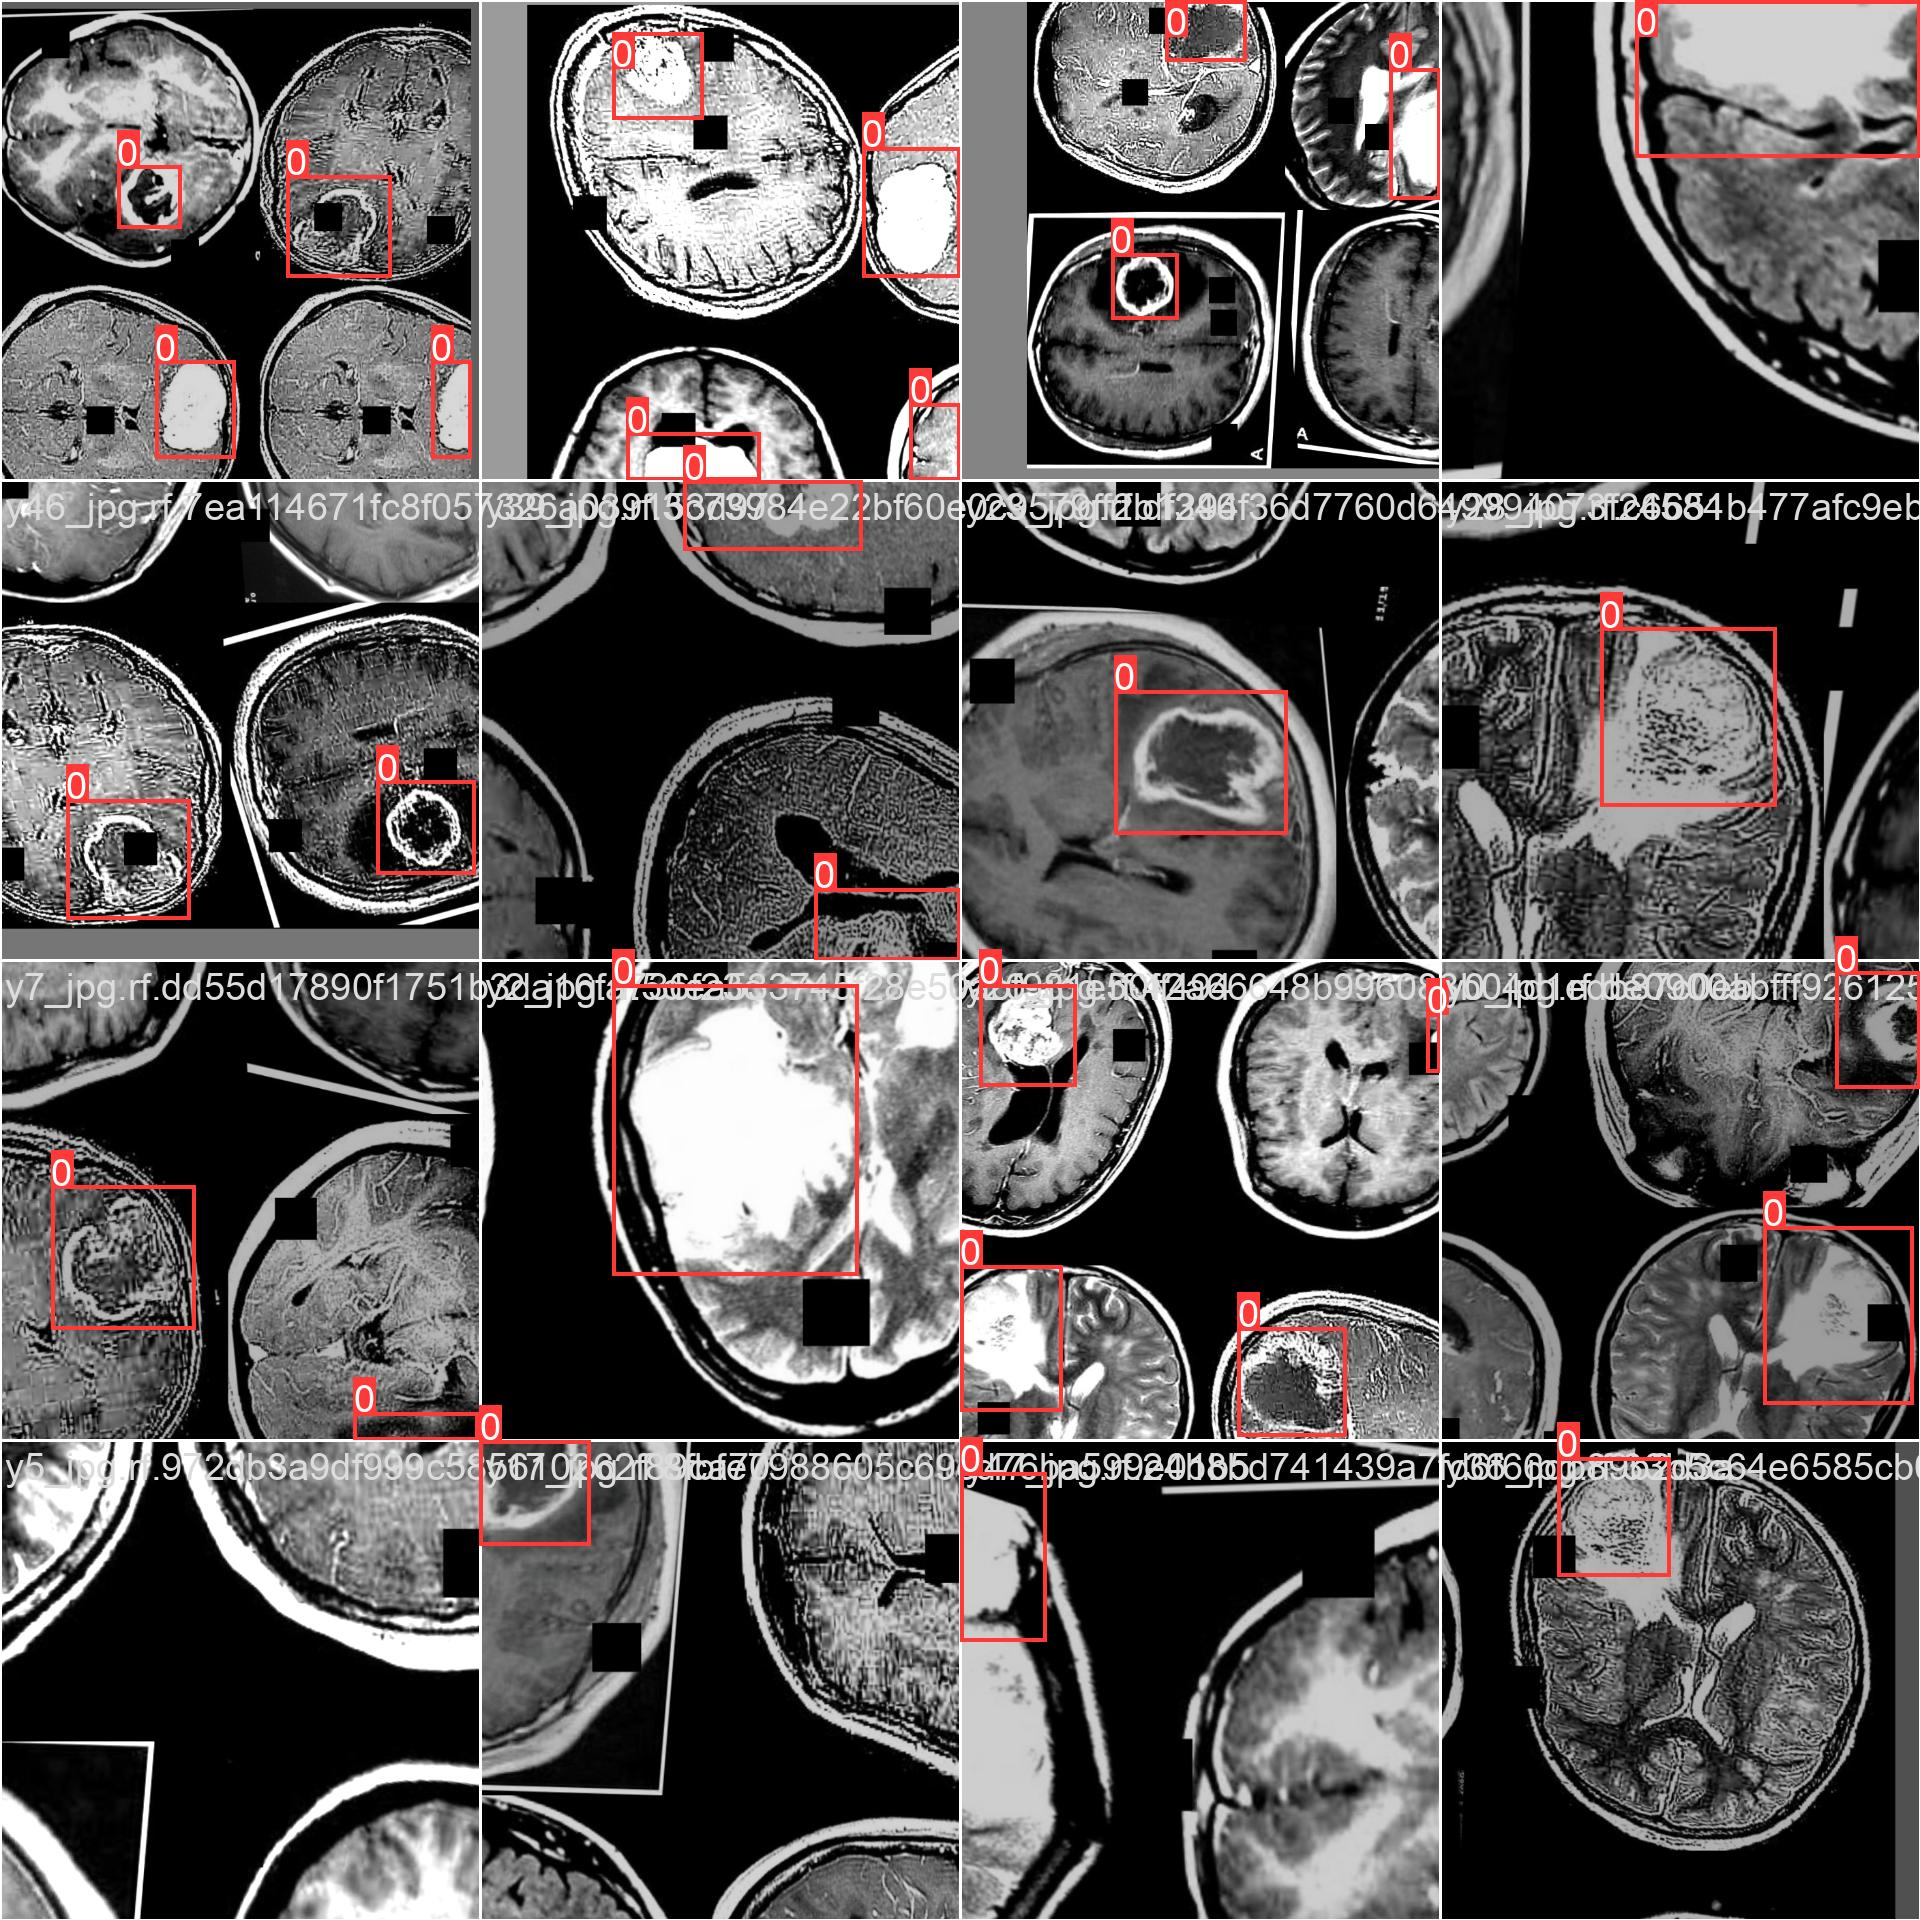

In [52]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/train_batch2.jpg',width=800)

# ***Train Batch 320 jpg Image***

/content


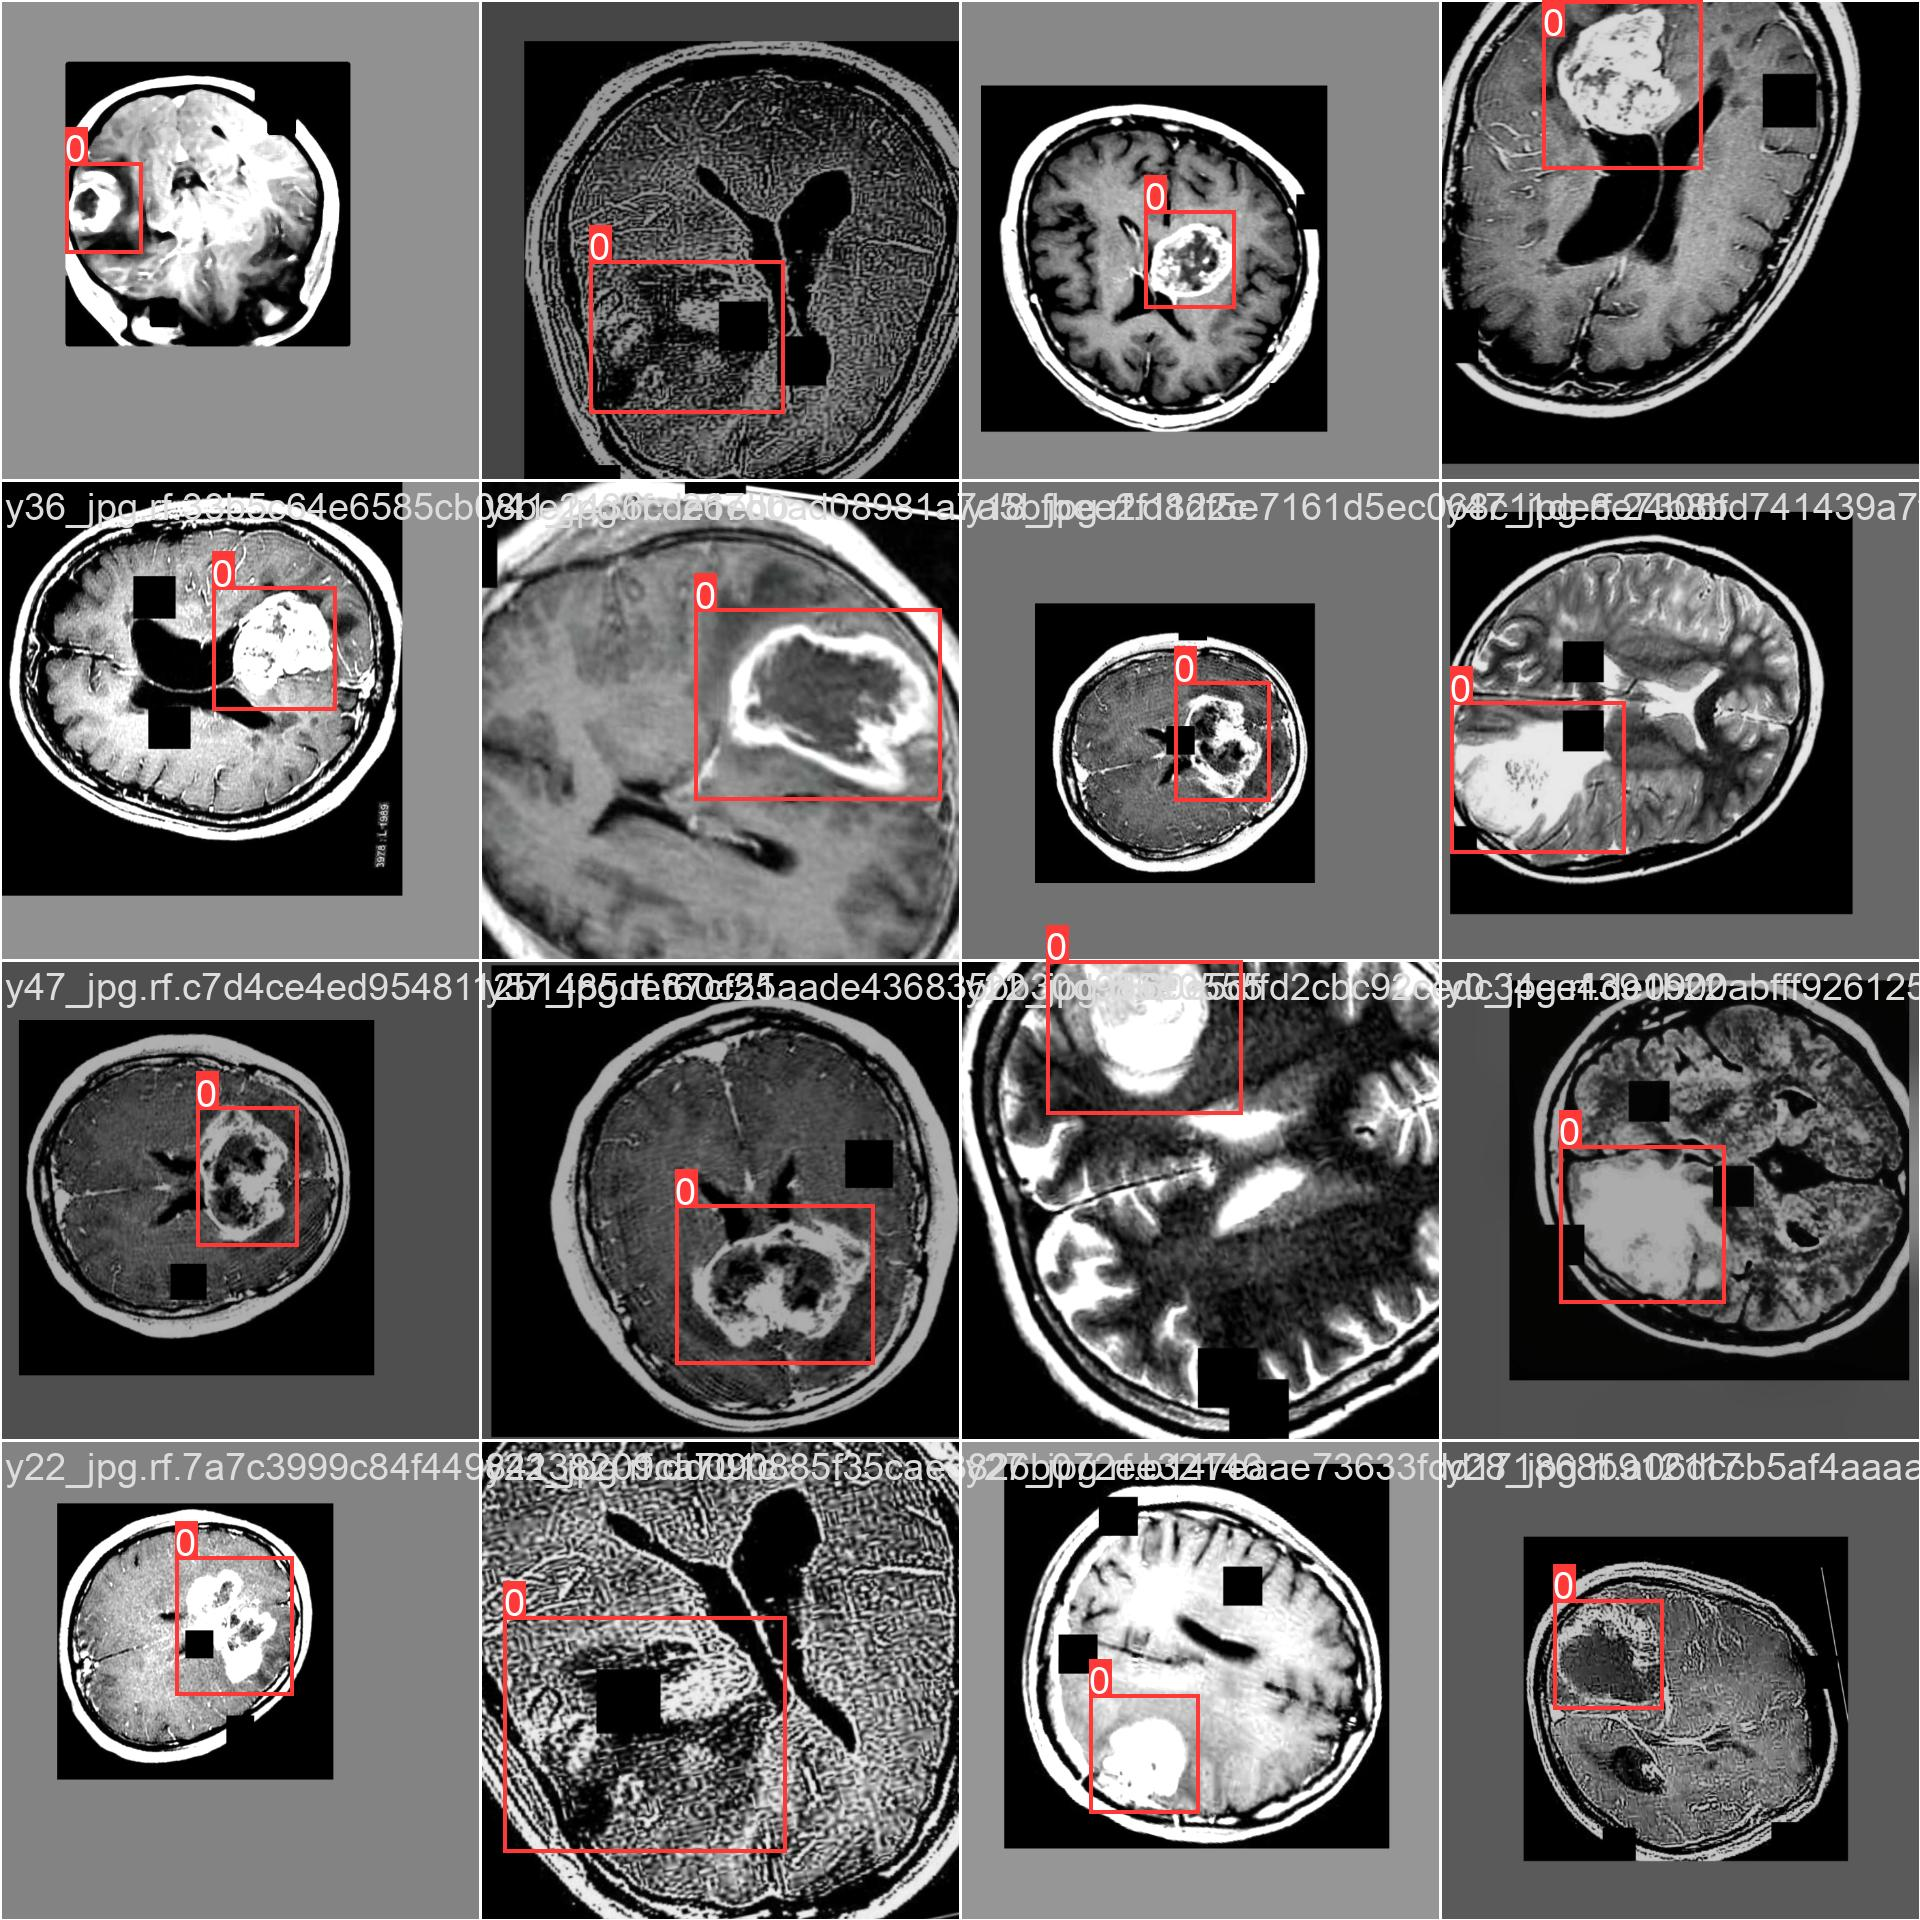

In [53]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/train_batch320.jpg',width=800)

# ***Train Batch 321 JPg iamge***

/content


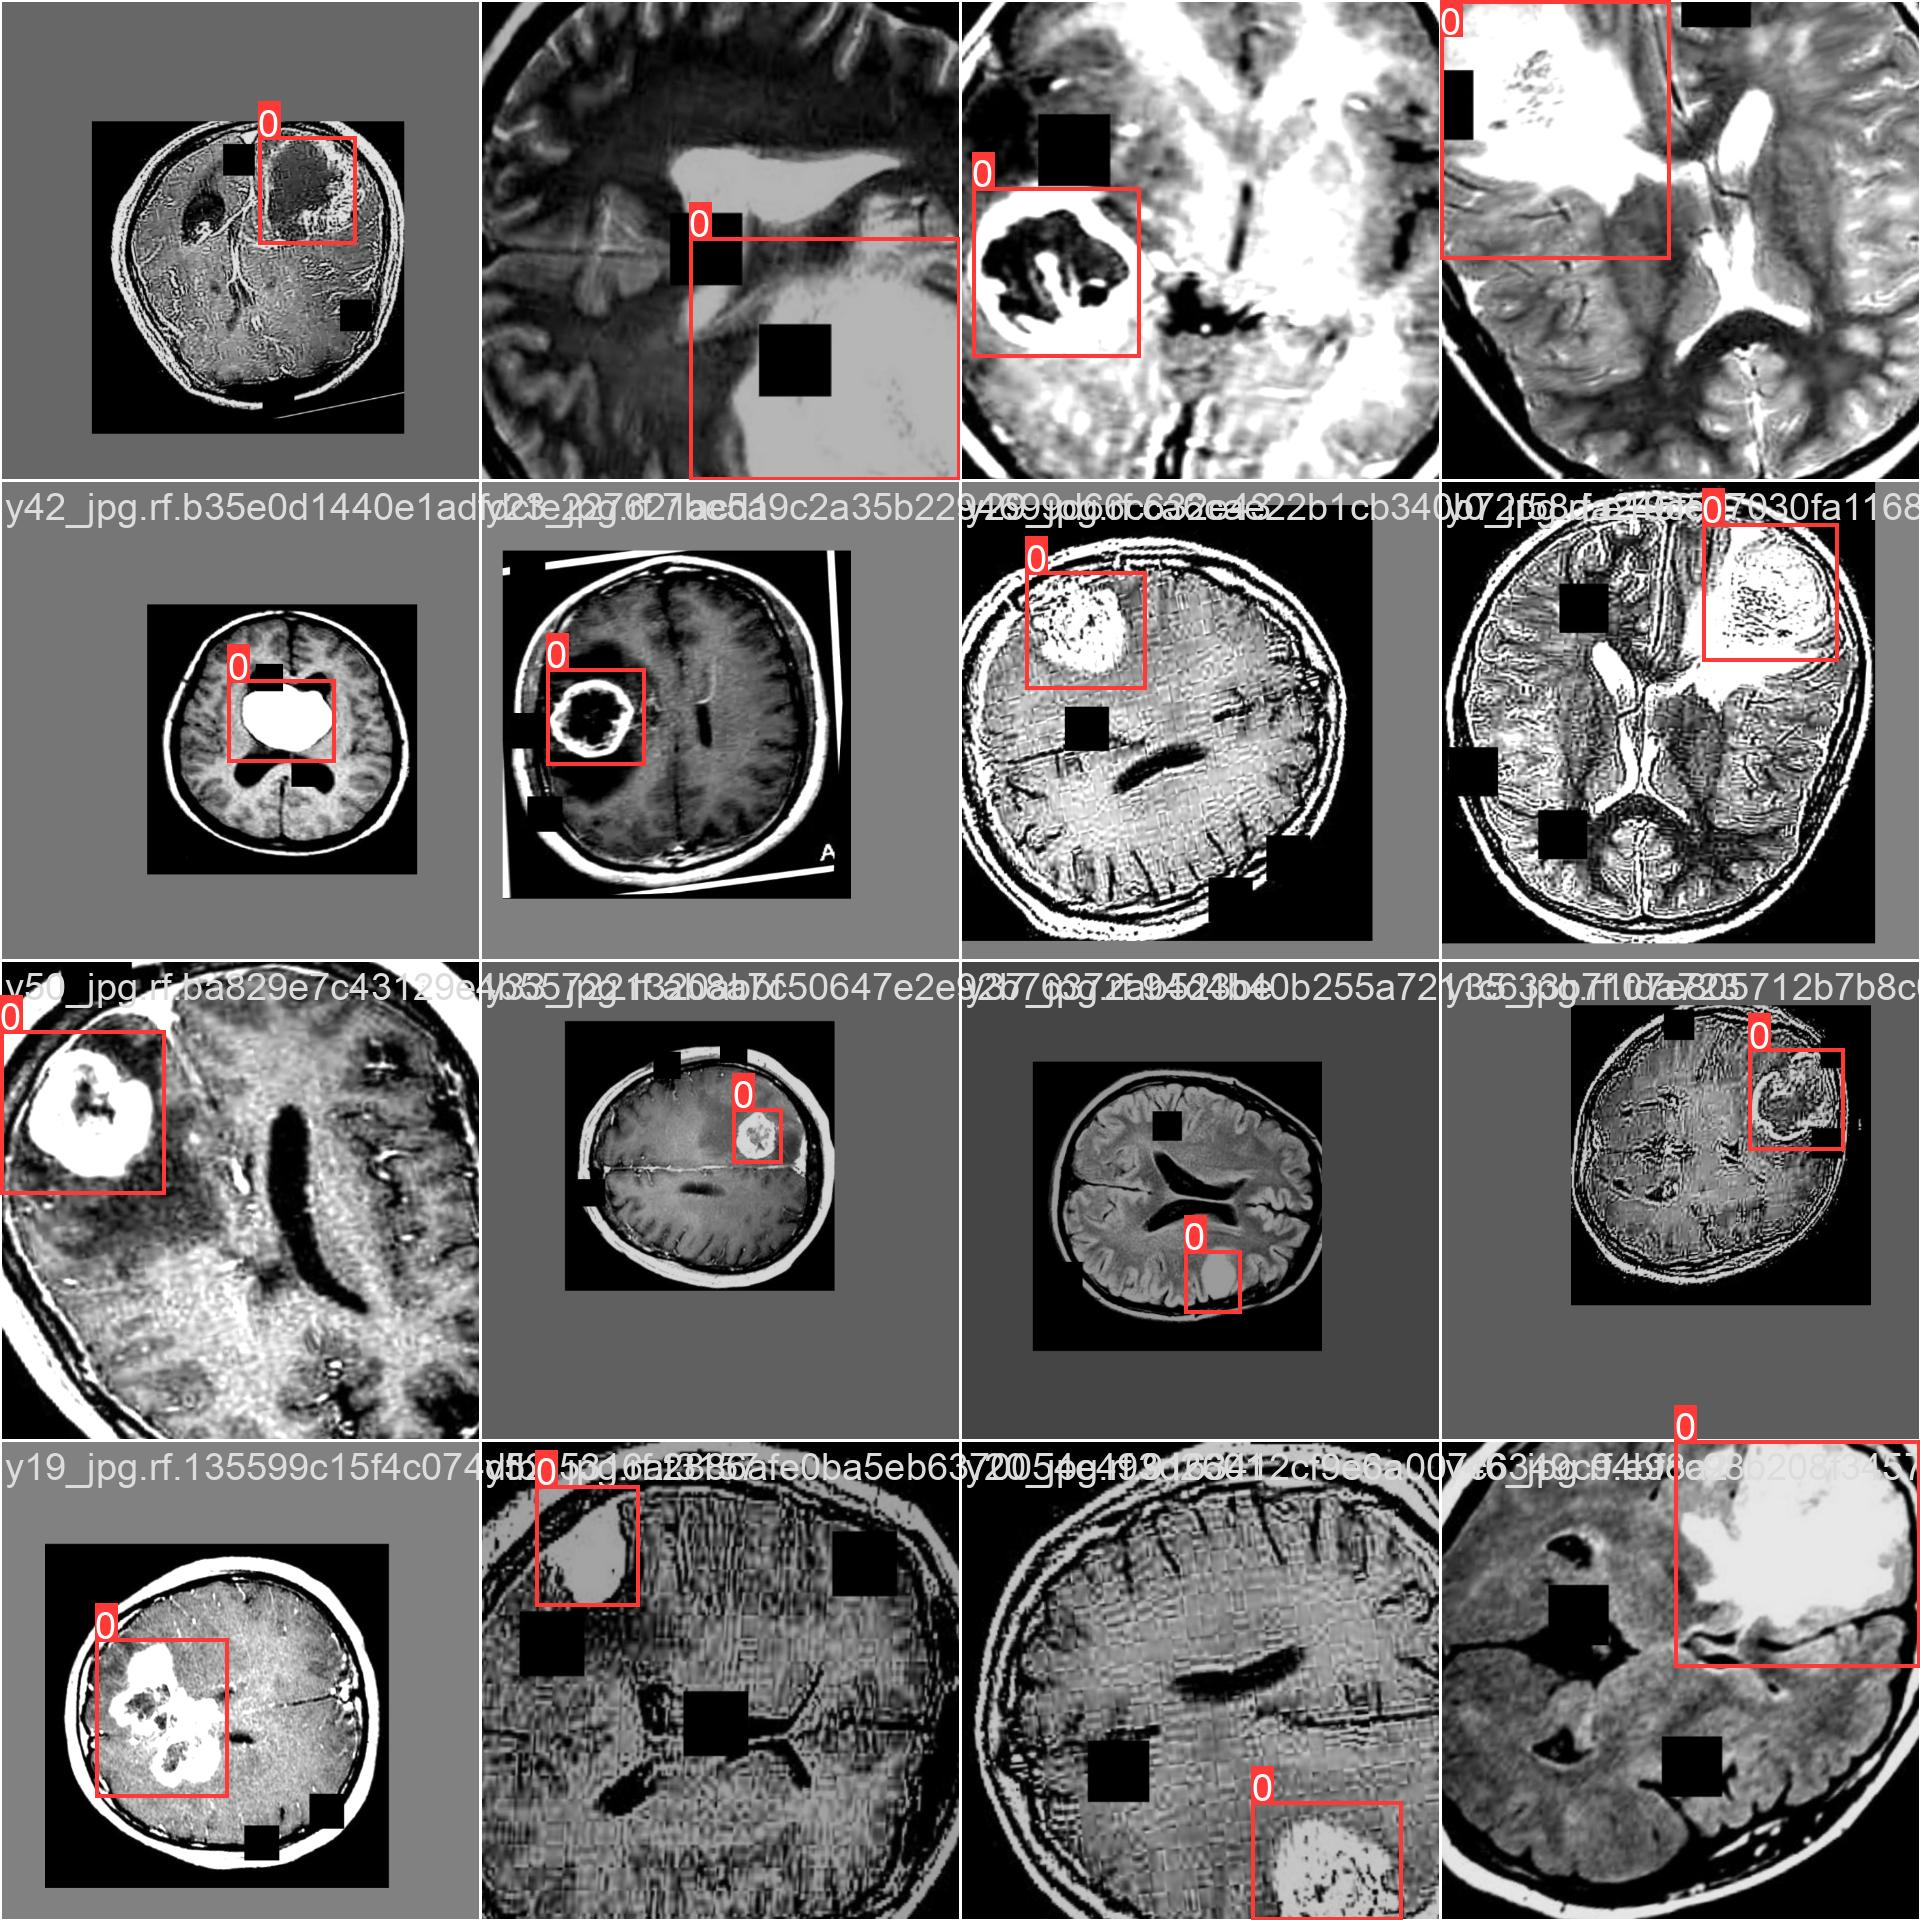

In [54]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/train_batch321.jpg',width=800)

# ***Train Batch 322 JPG image***

/content


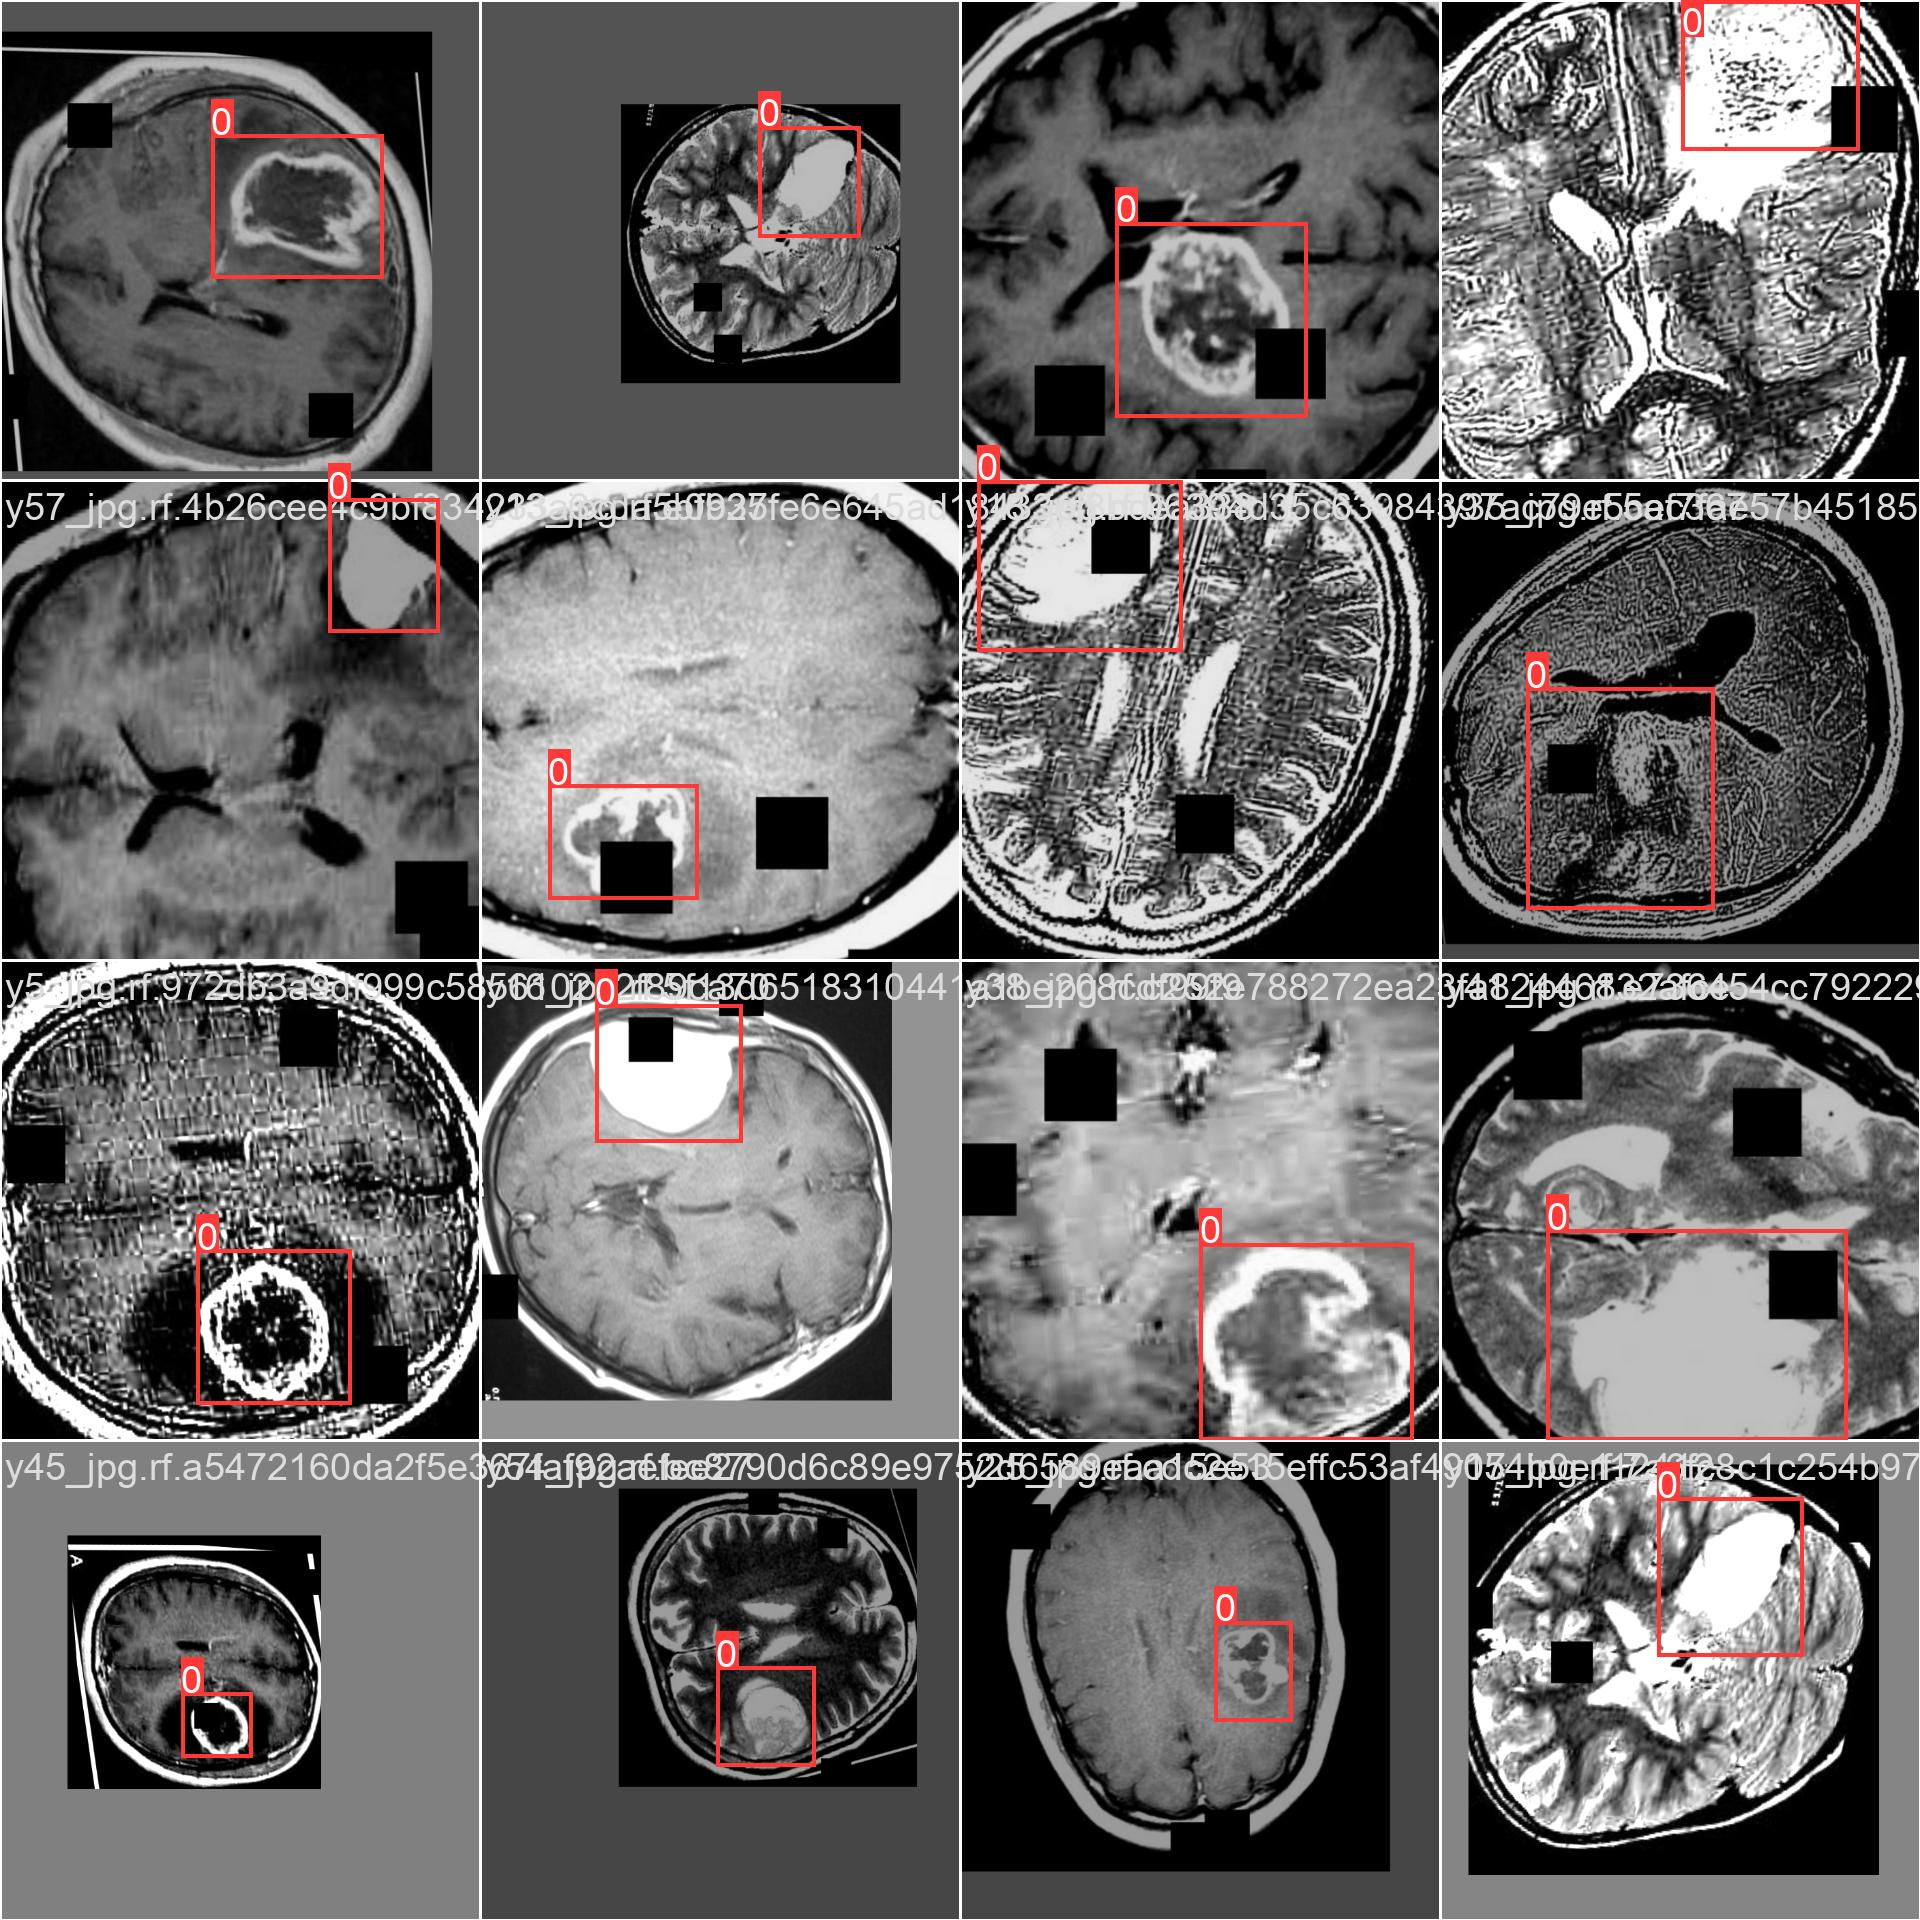

In [55]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/train_batch322.jpg',width=800)

# ***Ploting Some Validation Image With Labels PNG***

# ***Validation Batch0 Jpg Image***

/content


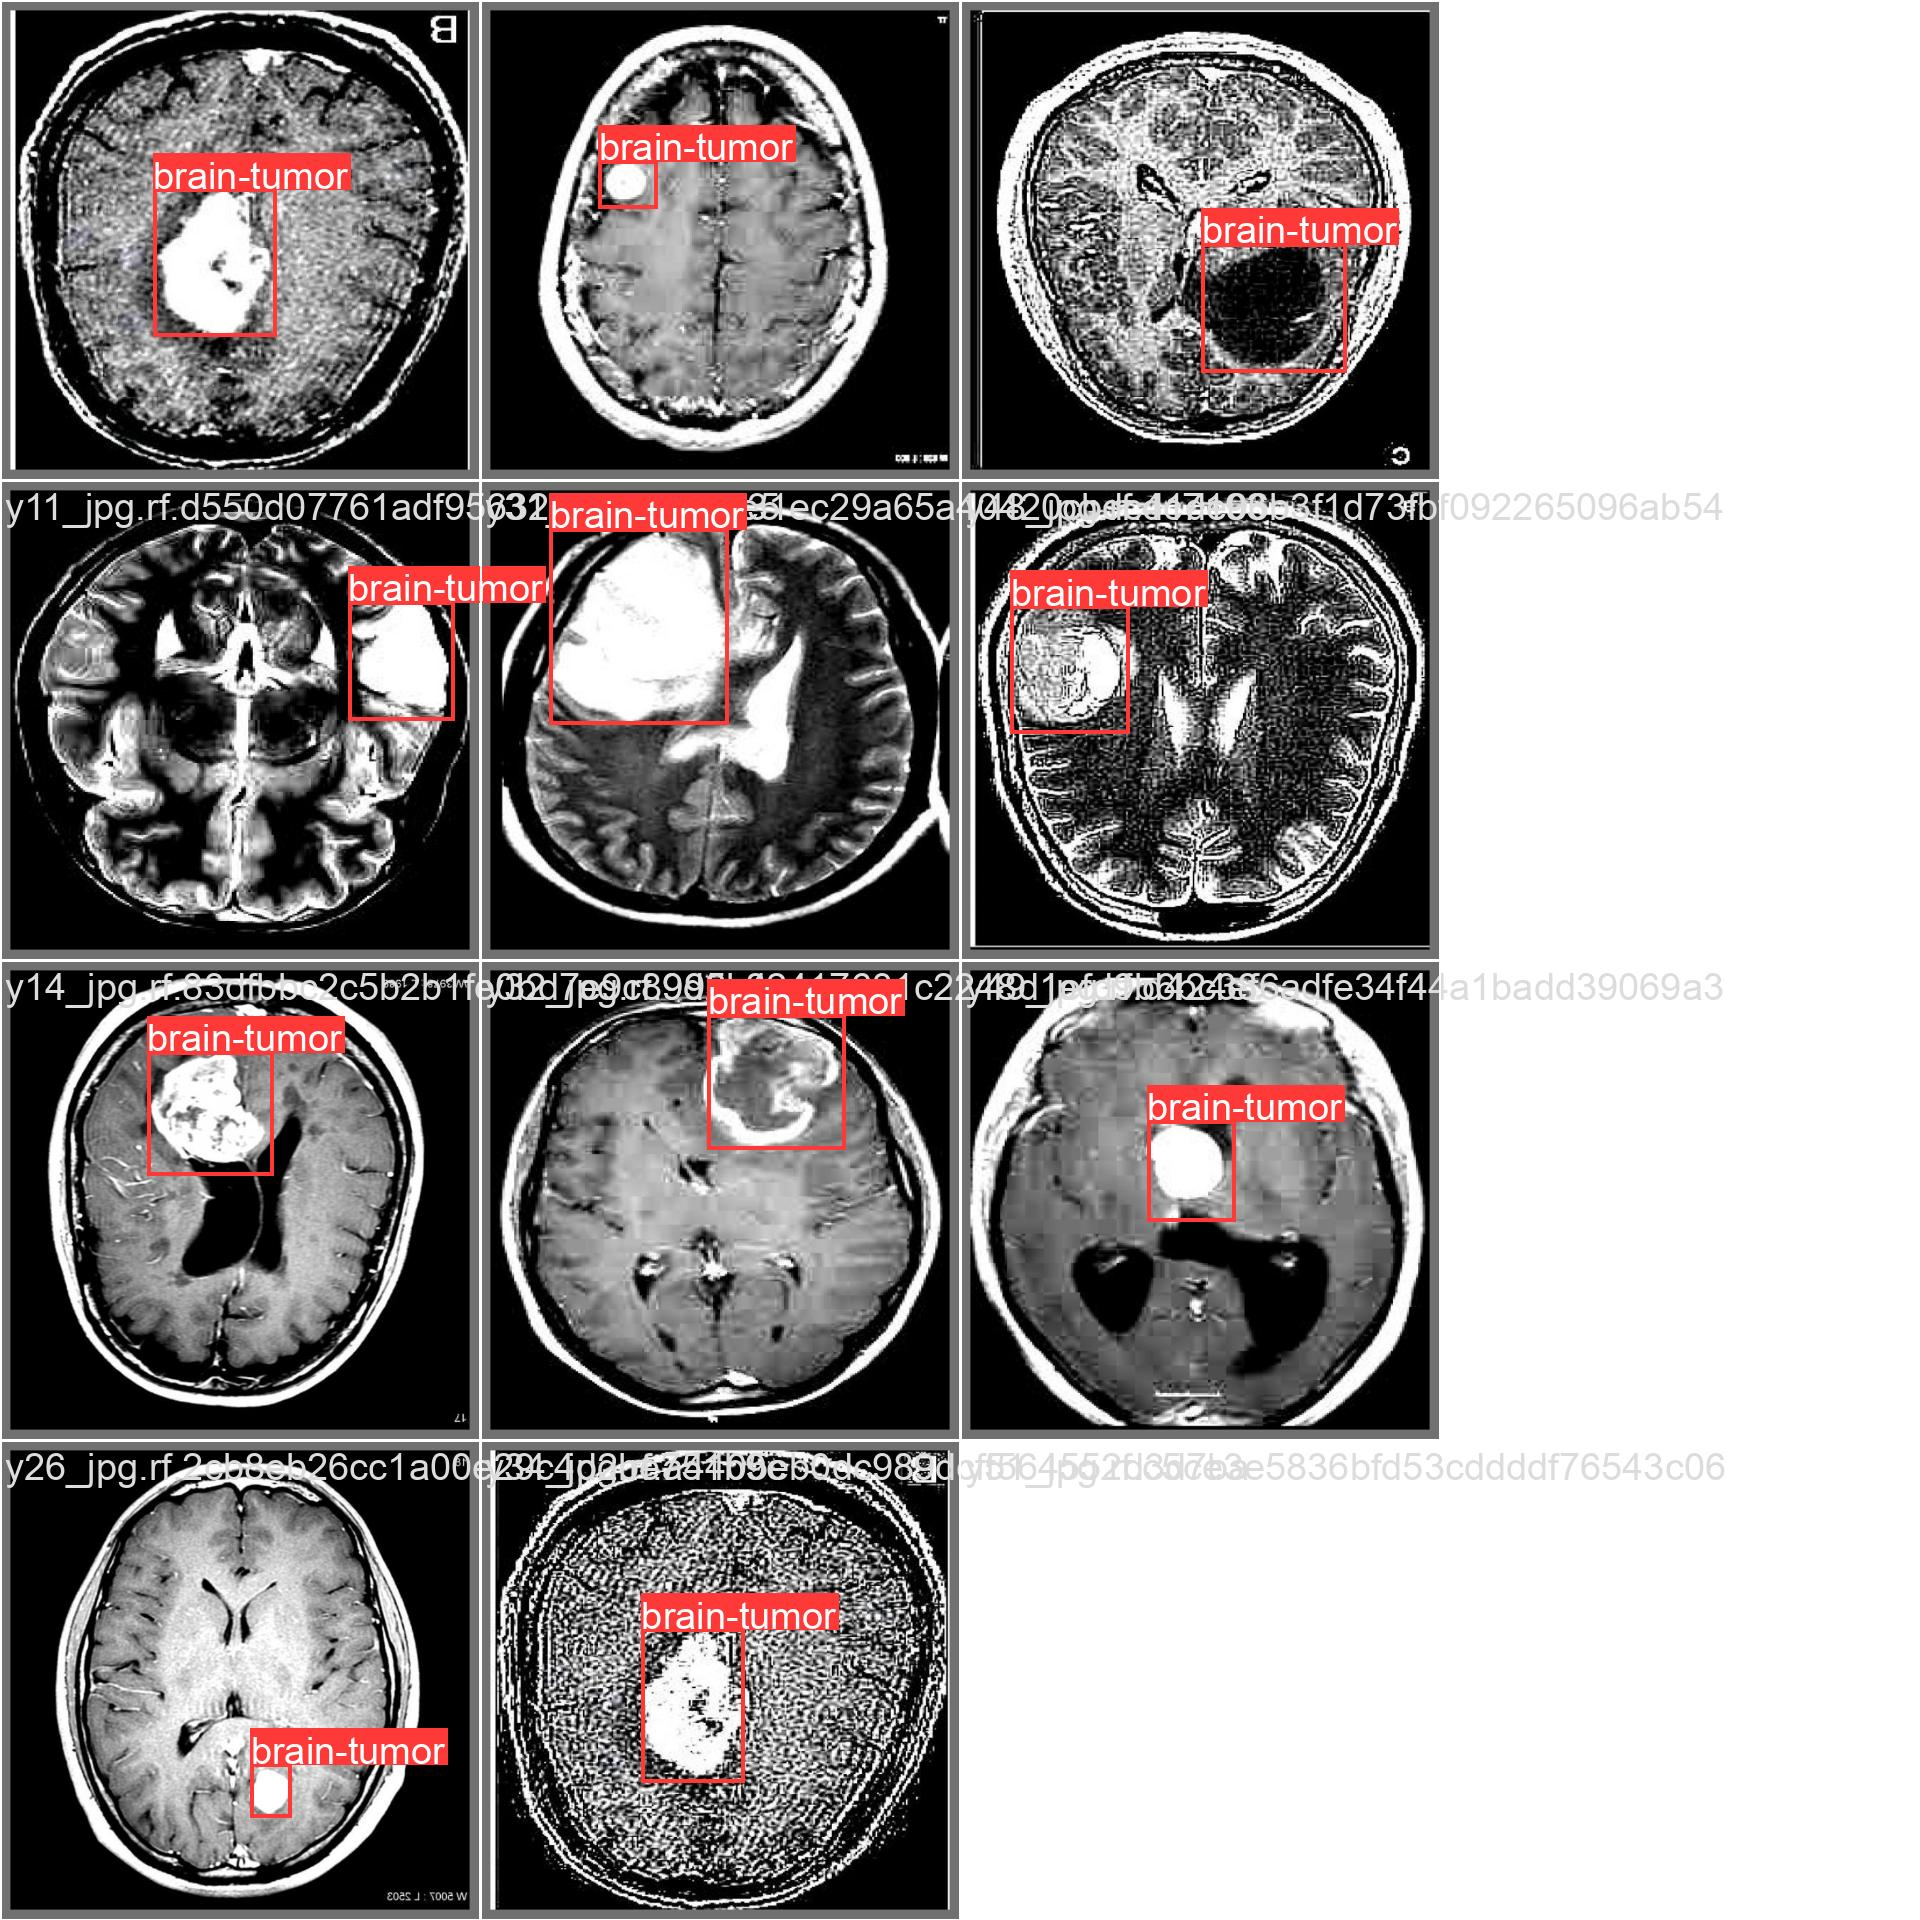

In [56]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/val_batch0_labels.jpg',width=800)

# ***Validation Pred JPG image AFter Custom Model Training***

/content


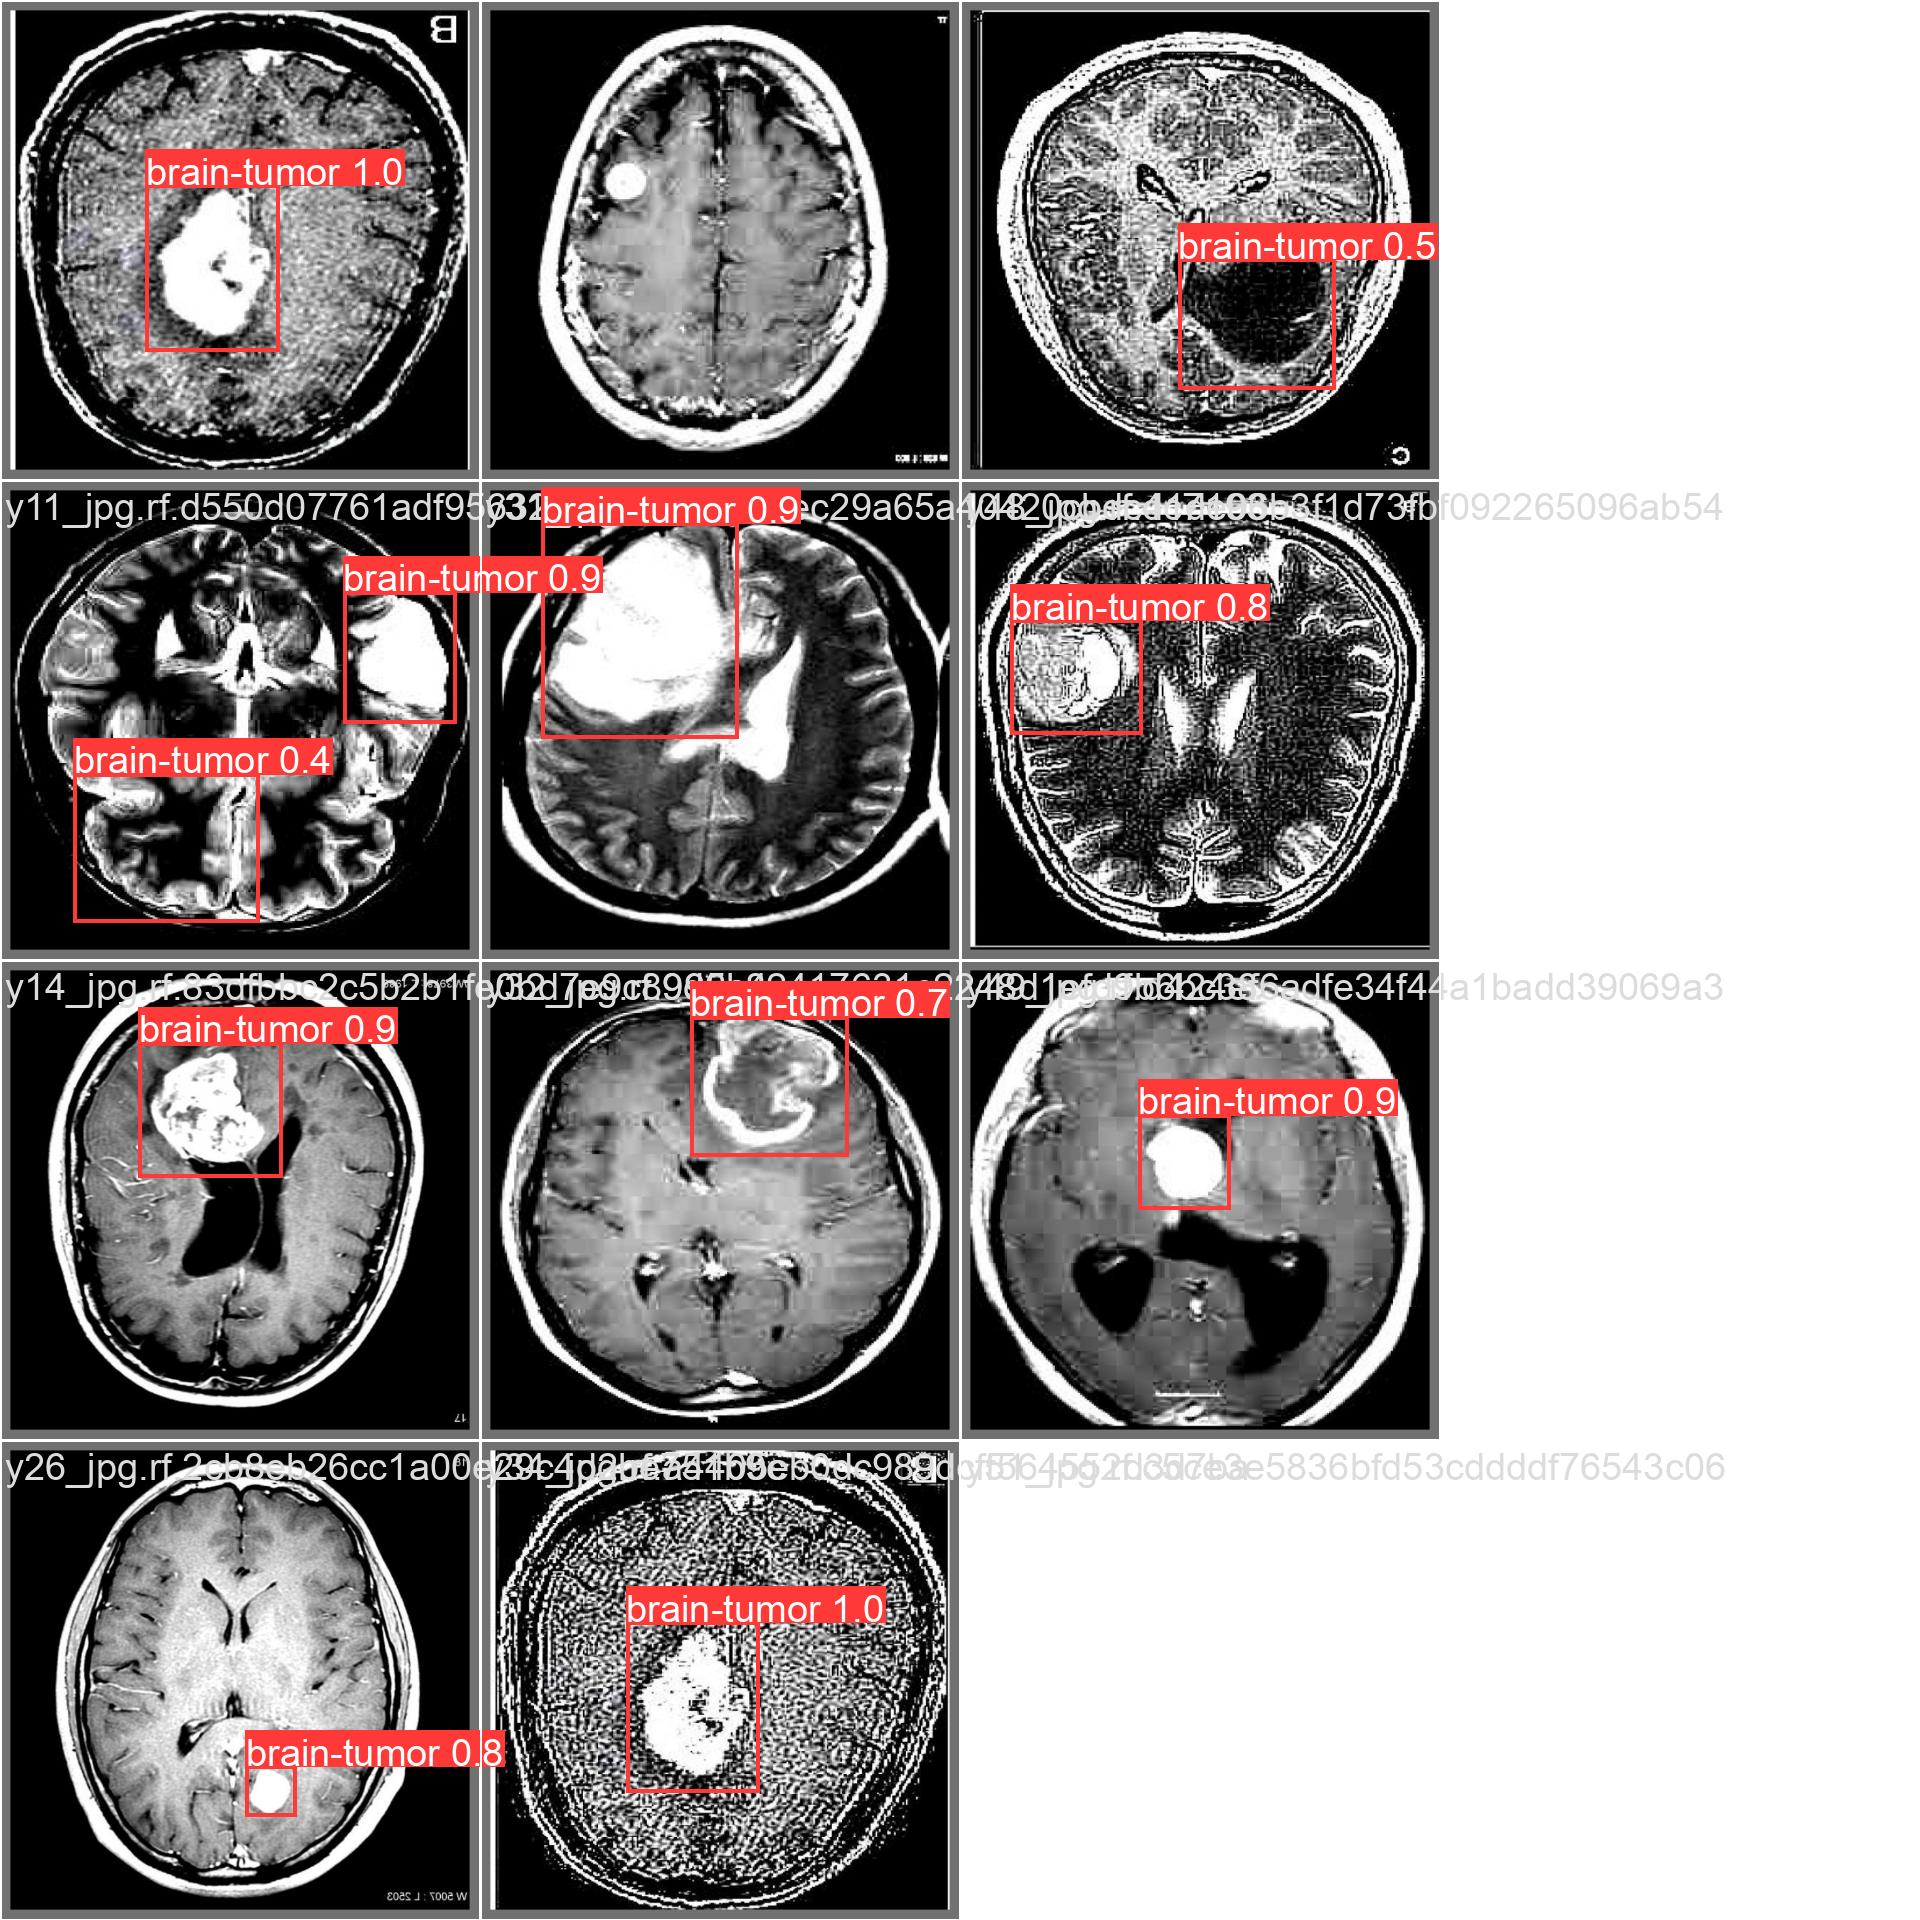

In [57]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg',width=800)

# ***Validation Total Number Of Tumor Images In Dataset***

In [59]:
%cd {HOME}

! yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-09-09 05:53:46.350454: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-09 05:53:47.272581: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/ik-moest-van-meneer-wulgaert-1/valid/labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100% 11/11 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.69it/s]
                   all         11         11      0.915      0.984      0.988      0.554
Speed: 0.3ms pre-p

# ***Created Predict All The Image After Training***

In [61]:
%cd {HOME}

! yolo task=detect mode=predict model ={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-09-09 05:54:59.310751: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-09 05:55:00.212584: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
image 1/7 /content/datasets/ik-moest-van-meneer-wulgaert-1/test/images/y15_jpg.rf.b63733bcf7a01ea03bbc0c79fef2bf75.jpg: 704x704 1 brain-tumor, 8.8ms
image 2/7 /content/datasets/ik-moest-van-meneer-wulgaert-1/test/images/y3_jpg.rf.54be388694d11da59361f5eadb37dc26.jpg: 704x704 1 brain-tumor, 8.8ms
image 3/7 /content/datasets/ik-moest-van-meneer-wulgaert-1/test/images/y53_jpg.rf.d1

# ***Ploting Testing Images After Training Custom Model***

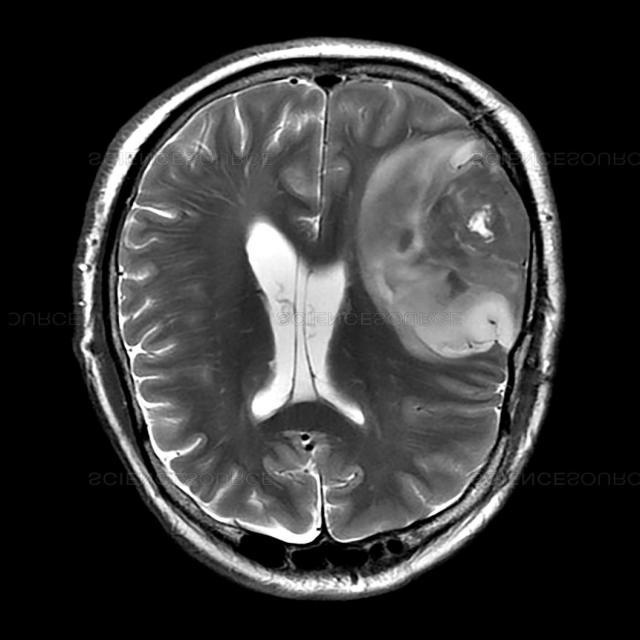

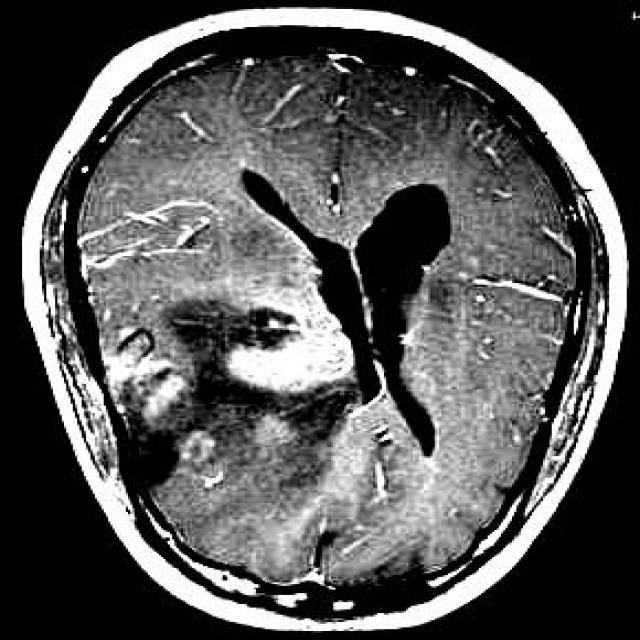

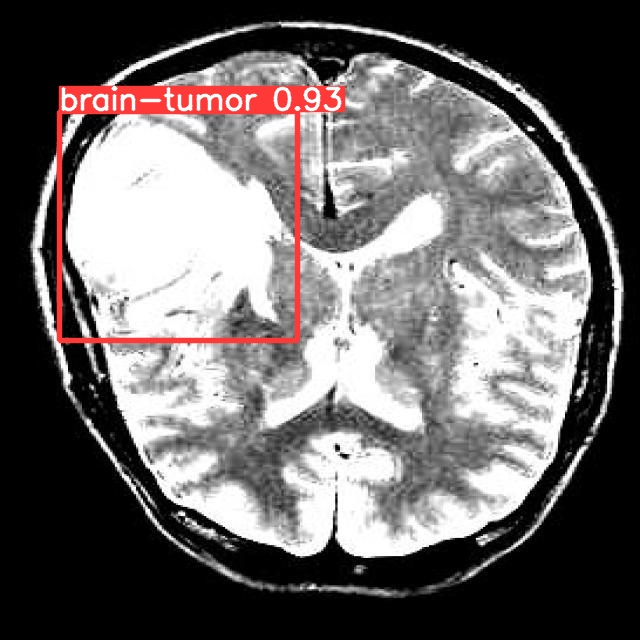

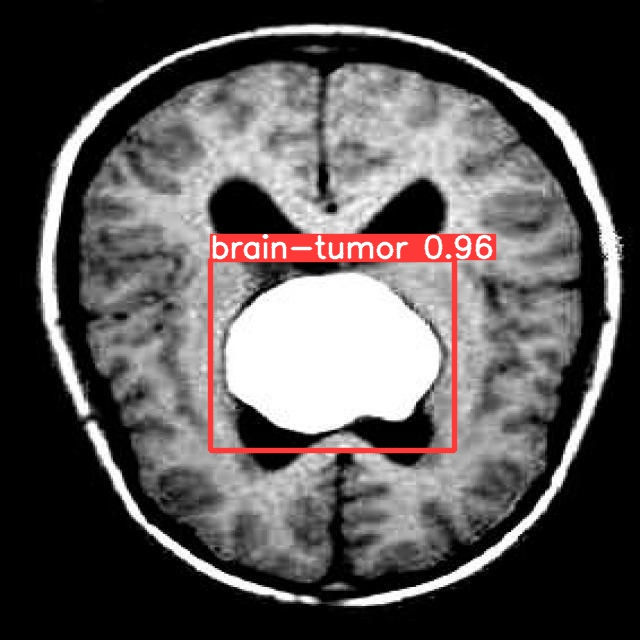

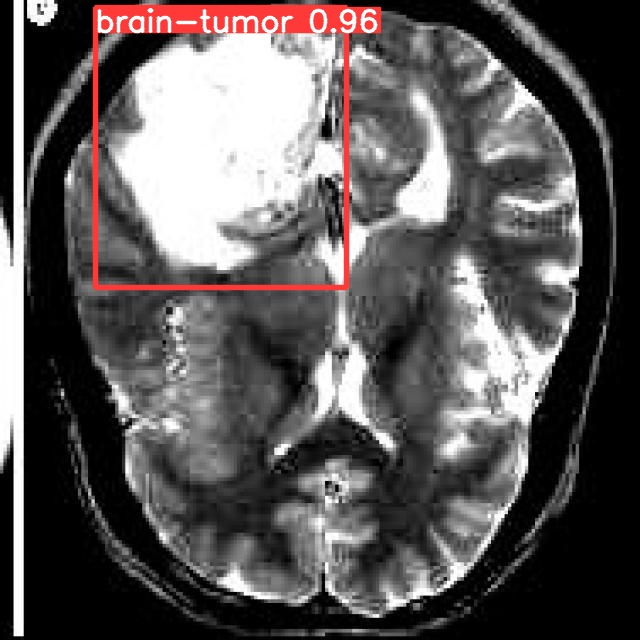

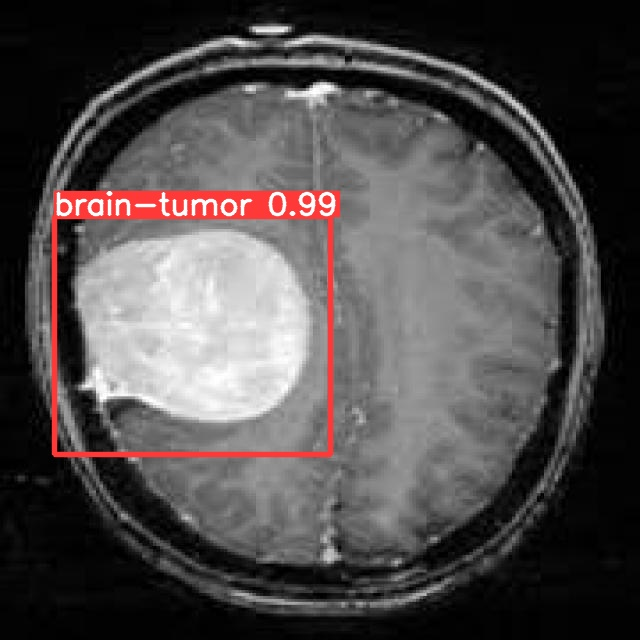

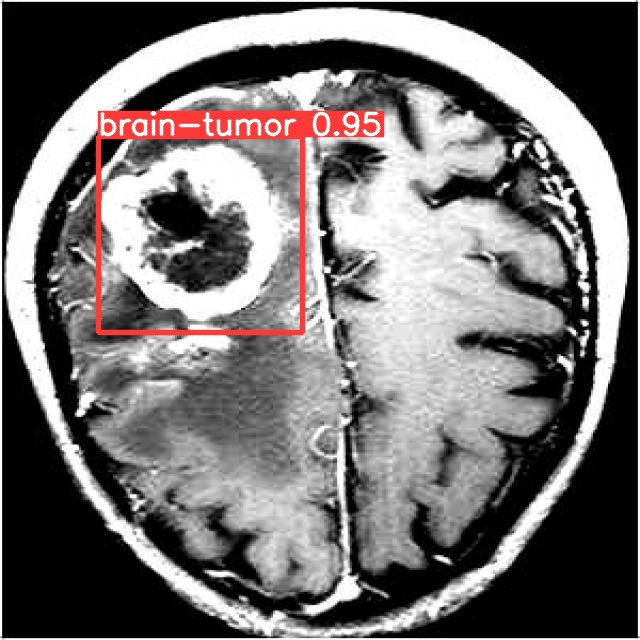

In [65]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:8]:
      display(Image(filename=image_path, width=600))
      print("\n")

# ***So Our Identification The Part Of Tumor Present In Brain Using Yolov8 Is Done I Hope You Learn New Things About Object Detection Using yolo Is Done***

# ***Thanks To All***
